#### Importing necessary libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os 

print('libraries imported!')

libraries imported!


#### Loading the transactions data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
os.listdir()

['.config', 'drive', 'sample_data']

In [ ]:
data_path = '/content/drive/MyDrive/transactions.json'
data_path = '/content/drive/MyDrive/Colab_Notebooks/INFO251/Final Project/transactions.csv' #Abdullah
#df = pd.read_json(data_path,lines=True)
df = pd.read_csv(data_path)

df.head()

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,...,echoBuffer,currentBalance,merchantCity,merchantState,merchantZip,cardPresent,posOnPremises,recurringAuthInd,expirationDateKeyInMatch,isFraud
0,737265056,737265056,5000.0,5000.0,2016-08-13T14:27:32,98.55,Uber,US,US,2.0,...,NaN,0.0,NaN,NaN,NaN,False,NaN,NaN,False,False
1,737265056,737265056,5000.0,5000.0,2016-10-11T05:05:54,74.51,AMC #191138,US,US,9.0,...,NaN,0.0,NaN,NaN,NaN,True,NaN,NaN,False,False
2,737265056,737265056,5000.0,5000.0,2016-11-08T09:18:39,7.47,Play Store,US,US,9.0,...,NaN,0.0,NaN,NaN,NaN,False,NaN,NaN,False,False
3,737265056,737265056,5000.0,5000.0,2016-12-10T02:14:50,7.47,Play Store,US,US,9.0,...,NaN,0.0,NaN,NaN,NaN,False,NaN,NaN,False,False
4,830329091,830329091,5000.0,5000.0,2016-03-24T21:04:46,71.18,Tim Hortons #947751,US,US,2.0,...,NaN,0.0,NaN,NaN,NaN,True,NaN,NaN,False,False


#### Dimensionality of data

In [ ]:
print('Dimensionality of the dataframe = ',df.shape)
print('No. of records/rows = ',df.shape[0])
print('No. of features/columns = ',df.shape[1])

Dimensionality of the dataframe =  (786363, 29)
No. of records/rows =  786363
No. of features/columns =  29


#### Studying the descriptive (summary) statistics for each numeric field

##### This dataframe provides us with the various statistics of our feature variables such as the mean, median, mode, min/max value, etc. These properties help us better understand the individual columns and there distribution.

##### Example : The max value of transaction amount is 2011 whereas its 75th percentile is at 191. This means that even though the highest value is greater than 2000, 75% of the column values are less than 200 which indicates that the distribution is right skewed.

In [ ]:
df.describe()

,accountNumber,customerId,creditLimit,availableMoney,transactionAmount,posEntryMode,posConditionCode,cardCVV,enteredCVV,cardLast4Digits,echoBuffer,currentBalance,merchantCity,merchantState,merchantZip,posOnPremises,recurringAuthInd
count,7.863630e+05,7.863630e+05,786363.000000,786363.000000,786363.000000,782309.000000,785954.000000,786363.000000,786363.000000,786363.000000,0.0,786363.000000,0.0,0.0,0.0,0.0,0.0
mean,5.372326e+08,5.372326e+08,10759.464459,6250.725369,136.985791,9.049943,3.271980,544.467338,544.183857,4757.417799,NaN,4508.739089,NaN,NaN,NaN,NaN,NaN
std,2.554211e+08,2.554211e+08,11636.174890,8880.783989,147.725569,16.774130,9.809023,261.524220,261.551254,2996.583810,NaN,6457.442068,NaN,NaN,NaN,NaN,NaN
min,1.000881e+08,1.000881e+08,250.000000,-1005.630000,0.000000,2.000000,1.000000,100.000000,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
25%,3.301333e+08,3.301333e+08,5000.000000,1077.420000,33.650000,2.000000,1.000000,310.000000,310.000000,2178.000000,NaN,689.910000,NaN,NaN,NaN,NaN,NaN
50%,5.074561e+08,5.074561e+08,7500.000000,3184.860000,87.900000,5.000000,1.000000,535.000000,535.000000,4733.000000,NaN,2451.760000,NaN,NaN,NaN,NaN,NaN
75%,7.676200e+08,7.676200e+08,15000.000000,7500.000000,191.480000,9.000000,1.000000,785.000000,785.000000,7338.000000,NaN,5291.095000,NaN,NaN,NaN,NaN,NaN
max,9.993896e+08,9.993896e+08,50000.000000,50000.000000,2011.540000,90.000000,99.000000,998.000000,998.000000,9998.000000,NaN,47498.810000,NaN,NaN,NaN,NaN,NaN


#### Replacing all the null values (empty strings) with nan values 


##### There are many empty strings, i.e a string of zero length present in our text file and represented as "". Basically, a null value is represented as "" in text file whereas in python, null means nothing (no value at all). None (in python) is used to represent a null value. So, all these null values (in txt file) needs to be converted into a none value in python

In [ ]:
df.replace("",np.nan,inplace=True)

#### Checking the metadata

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 786363 entries, 0 to 786362
Data columns (total 29 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   accountNumber             786363 non-null  int64  
 1   customerId                786363 non-null  int64  
 2   creditLimit               786363 non-null  float64
 3   availableMoney            786363 non-null  float64
 4   transactionDateTime       786363 non-null  object 
 5   transactionAmount         786363 non-null  float64
 6   merchantName              786363 non-null  object 
 7   acqCountry                781801 non-null  object 
 8   merchantCountryCode       785639 non-null  object 
 9   posEntryMode              782309 non-null  float64
 10  posConditionCode          785954 non-null  float64
 11  merchantCategoryCode      786363 non-null  object 
 12  currentExpDate            786363 non-null  object 
 13  accountOpenDate           786363 non-null  o

#### Checking for NULL values in the dataset

##### Columns like 'echoBuffer', 'merchantCity', 'merchantState', 'merchantZip', 'posOnPremises', 'recurringAuthInd' are TOTALLY EMPTY (ALL NULL VALUES). These don't contain even a single value and hence should be dropped.

In [ ]:
df.isna().sum()

accountNumber                    0
customerId                       0
creditLimit                      0
availableMoney                   0
transactionDateTime              0
transactionAmount                0
merchantName                     0
acqCountry                    4562
merchantCountryCode            724
posEntryMode                  4054
posConditionCode               409
merchantCategoryCode             0
currentExpDate                   0
accountOpenDate                  0
dateOfLastAddressChange          0
cardCVV                          0
enteredCVV                       0
cardLast4Digits                  0
transactionType                698
echoBuffer                  786363
currentBalance                   0
merchantCity                786363
merchantState               786363
merchantZip                 786363
cardPresent                      0
posOnPremises               786363
recurringAuthInd            786363
expirationDateKeyInMatch         0
isFraud             

##### Dropping columns containing all null values.

In [ ]:
df.drop(['echoBuffer', 'merchantCity', 'merchantState', 'merchantZip', 'posOnPremises', 'recurringAuthInd'],axis=1,inplace=True)

#### Cleaned structure of the dataframe
##### Out of the 23 features remaining in our dataset - 6 INT, 3 FLOAT, 11 STRING - (4 TIMESTAMP, 7 CATEGORICAL), and 3 BOOLEAN

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 786363 entries, 0 to 786362
Data columns (total 23 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   accountNumber             786363 non-null  int64  
 1   customerId                786363 non-null  int64  
 2   creditLimit               786363 non-null  float64
 3   availableMoney            786363 non-null  float64
 4   transactionDateTime       786363 non-null  object 
 5   transactionAmount         786363 non-null  float64
 6   merchantName              786363 non-null  object 
 7   acqCountry                781801 non-null  object 
 8   merchantCountryCode       785639 non-null  object 
 9   posEntryMode              782309 non-null  float64
 10  posConditionCode          785954 non-null  float64
 11  merchantCategoryCode      786363 non-null  object 
 12  currentExpDate            786363 non-null  object 
 13  accountOpenDate           786363 non-null  o

#### Adding a new feature to detect whether the actual card CVV matched with the CVV entered during the transaction

In [ ]:
df['matching cvv'] = df['cardCVV'] == df['enteredCVV']

#### Studying the unique values in various columns of the dataset to further understand the dataset and Capital one policies

In [ ]:
print('Unique values in acqCountry = ',df['acqCountry'].unique(),"\n" * 1)
print('Unique values in merchantName = ',df['merchantName'].unique(),"\n" * 1)
print('Unique values in merchantCountryCode = ',df['merchantCountryCode'].unique(),"\n" * 1)
print('Unique values in merchantCategoryCode = ',df['merchantCategoryCode'].unique(),"\n" * 1)
print('Unique values in transactionType = ',df['transactionType'].unique(),"\n" * 1)
print('Unique values in posEntryMode = ',df['posEntryMode'].unique(),"\n" * 1)
print('Unique values in posConditionCode = ',df['posConditionCode'].unique(),"\n" * 1)
print('Number of customers served by CAPITAL ONE =',df['customerId'].nunique(),"\n"*1)
print('Credit Limits provided by CAPITAL ONE =',df['creditLimit'].unique())

Unique values in acqCountry =  ['US' nan 'CAN' 'MEX' 'PR'] 

Unique values in merchantName =  ['Uber' 'AMC #191138' 'Play Store' ... 'ATT #141119' 'EZ Wireless #200746'
 'Runners #747070'] 

Unique values in merchantCountryCode =  ['US' 'CAN' nan 'PR' 'MEX'] 

Unique values in merchantCategoryCode =  ['rideshare' 'entertainment' 'mobileapps' 'fastfood' 'food_delivery'
 'auto' 'online_retail' 'gym' 'health' 'personal care' 'food' 'fuel'
 'online_subscriptions' 'online_gifts' 'hotels' 'airline' 'furniture'
 'subscriptions' 'cable/phone'] 

Unique values in transactionType =  ['PURCHASE' 'ADDRESS_VERIFICATION' 'REVERSAL' nan] 

Unique values in posEntryMode =  [ 2.  9.  5. 80. 90. nan] 

Unique values in posConditionCode =  [ 1.  8. 99. nan] 

Number of customers served by CAPITAL ONE = 5000 

Credit Limits provided by CAPITAL ONE = [ 5000.  2500. 50000. 15000. 10000.   250.   500.  1000.  7500. 20000.]


#### Data Visualization


##### As we can see, majority of the transactions being performed by the customer are of type 'PURCHASE'. It accounts for 94.7% of the total credit card transactions.

##### We can see that the dataset is highly unbalanced and 1.57% of the total transactions are faudlent in nature. It is very important for our model to have zero False negative. We can afford a transaction which is correct to be predicted as fraudlent but a fraudlent transaction should always be correctly classified.

##### 25.7 % of the transactions are done with an "online retail" merchant followed by 14.3 % for "fastfood", 10.1 % for "entertainment", 9.59 % for "food", etc.

##### Maximum fraudlent transactions took place for the "online retail" merchant category followed by "online gifts", "rideshare" even though these were not in the top 3 with respect to the number of transactions.

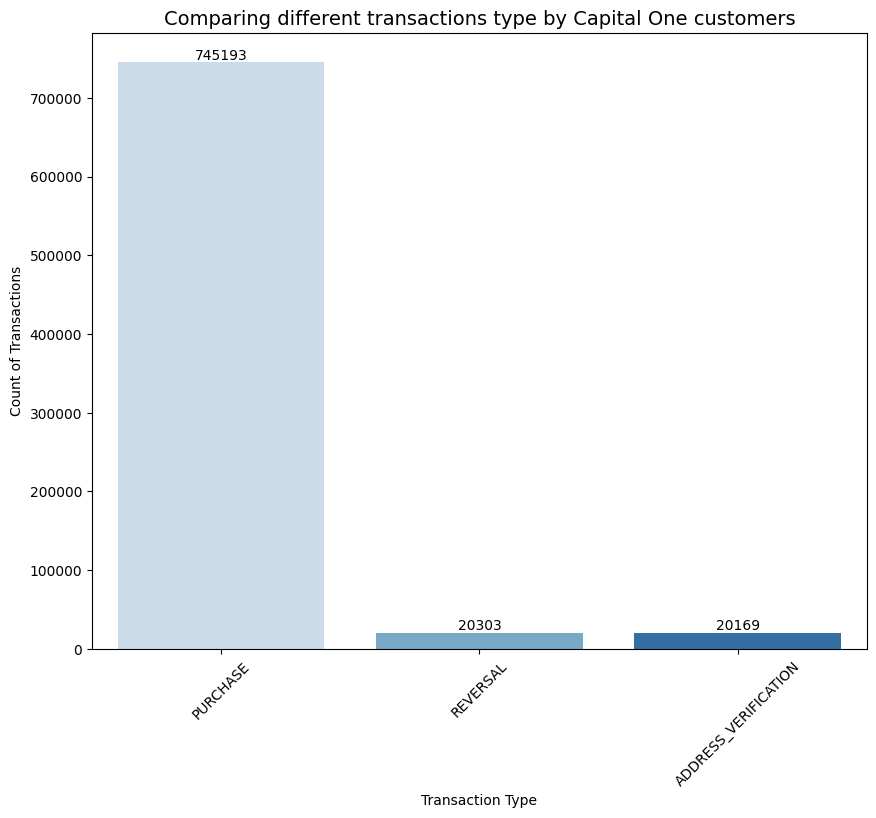

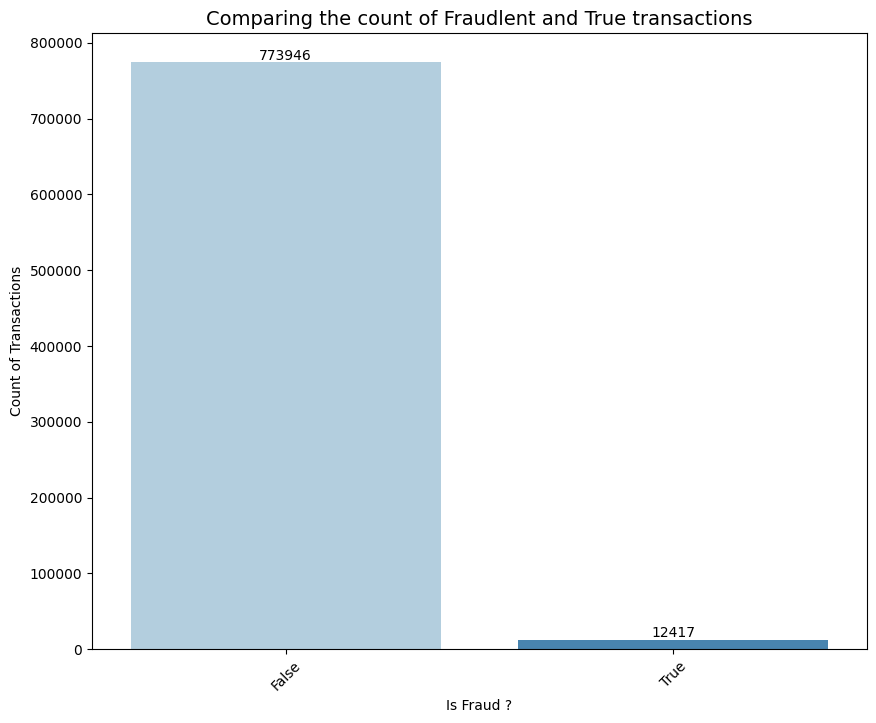

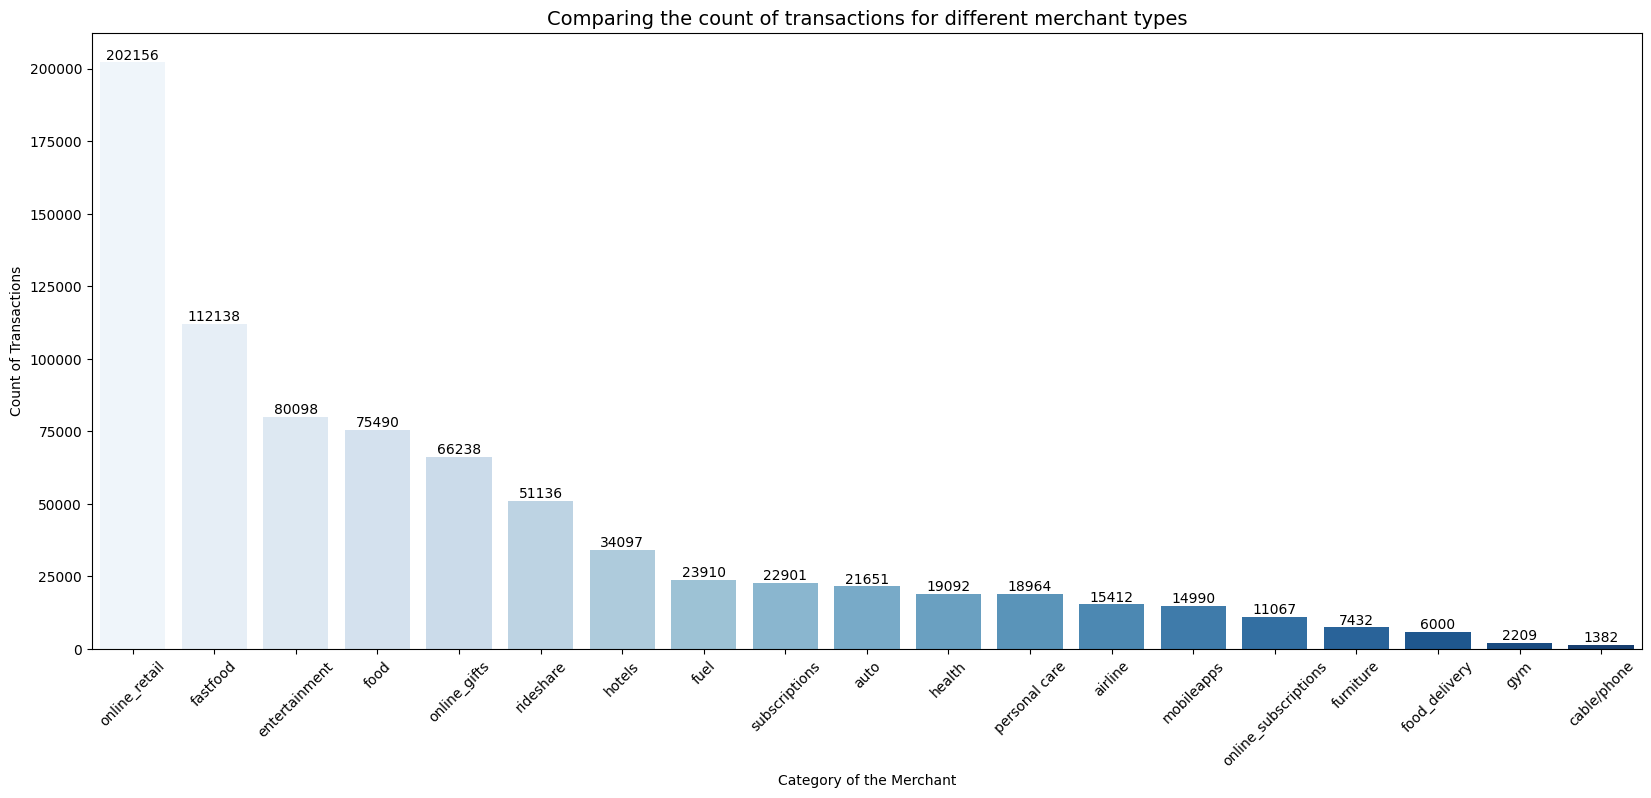

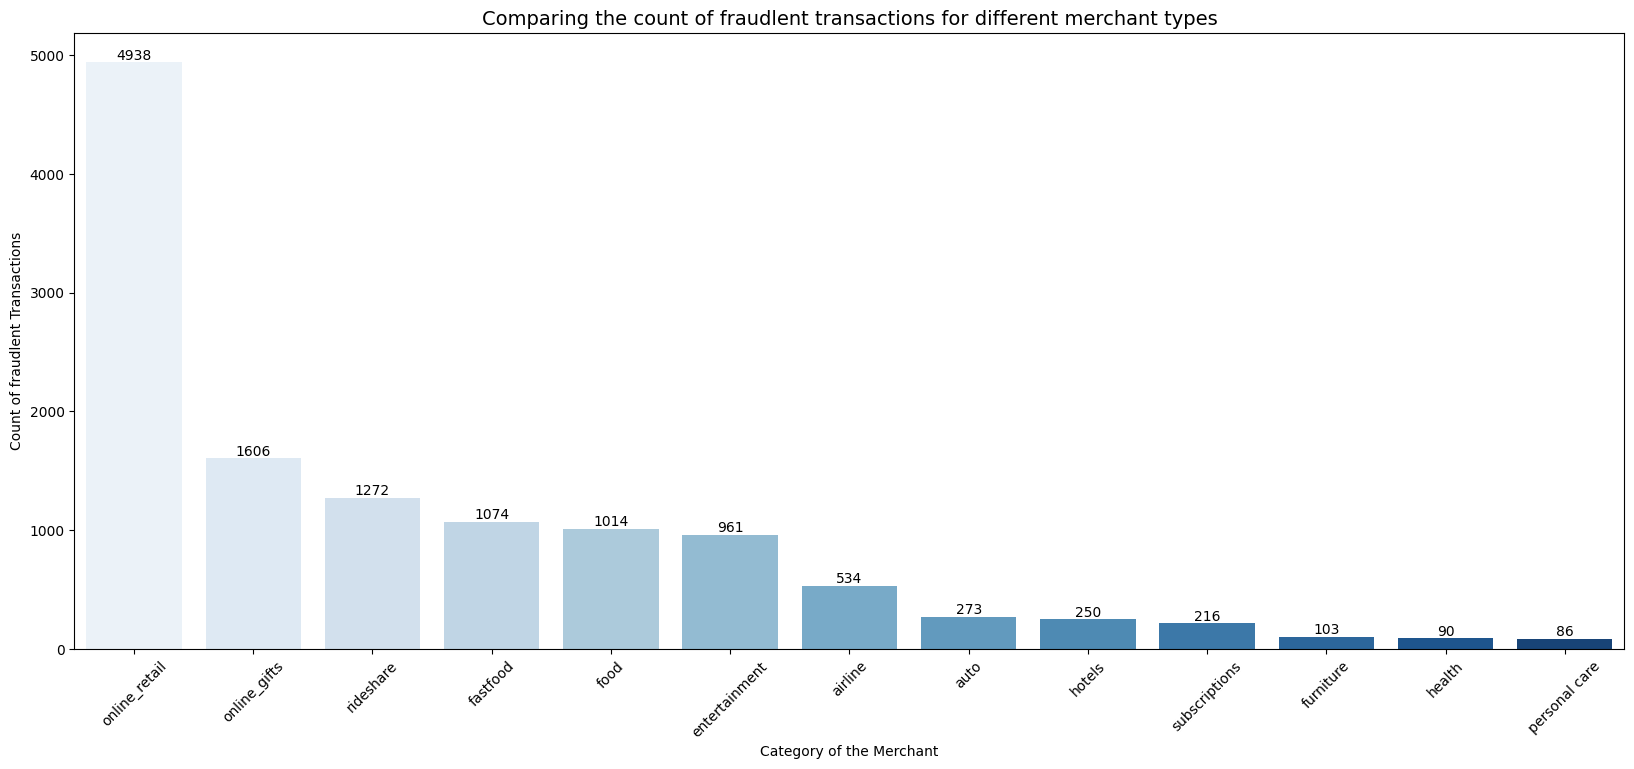

In [ ]:
def plot_graph(var,size,title,xlabel,ylabel,df):
    
    plt.figure(figsize = size)
    fig = sns.countplot(x = var, orient='h',palette='Blues', data = df,order = df[var].value_counts().index)
    fig.bar_label((fig.containers[0]))
    fig = plt.title(title, fontsize = 14)
    plt.xticks(rotation=45)
    plt.xlabel(xlabel,fontsize=10)
    plt.ylabel(ylabel,fontsize=10)
    plt.show()

plot_graph('transactionType',(10,8),'Comparing different transactions type by Capital One customers','Transaction Type','Count of Transactions',df)
plot_graph('isFraud',(10,8),'Comparing the count of Fraudlent and True transactions','Is Fraud ?','Count of Transactions',df)
plot_graph('merchantCategoryCode',(20,8),'Comparing the count of transactions for different merchant types','Category of the Merchant','Count of Transactions',df)
plot_graph('merchantCategoryCode',(20,8),'Comparing the count of fraudlent transactions for different merchant types','Category of the Merchant','Count of fraudlent Transactions',df[df['isFraud']==True])

#### Studying the relationship of various features with the target variable

##### The dataset is highly imbalanced, as expected, since most of the transactions that take place in real world are true and there are only a few fraudlent transactions, that makes it very difficult for the model to accurately predict such transactions. This problem of class imbalance can be tackled with the help of under-sampling or over-sampling.

##### US has the most number of transactions/fraudlent transactions taking place compared to other countries where Capital One serves like Canada and Puerto Rico.

##### The bar plot doesn't indicates that entering a wrong CVV is a strong indication of fraudlent transaction.

##### The maximum number of fraudlent transactions occur corresponding to '09' method followed by '02' used to enter the card holder information. 

##### The maximum number of fraudlent transactions occur corresponding to '01' POS code followed by '08'.

##### The PURCHASE transaction type owing to maximum number of transactions has the most fraudlent transactions followed by REVERSAL type.

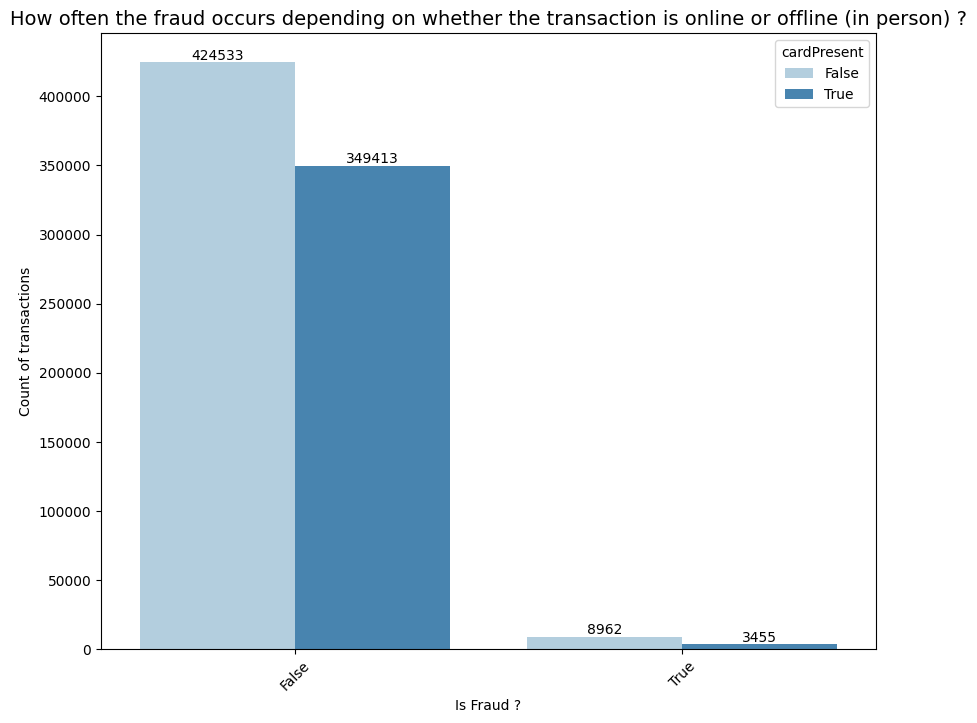

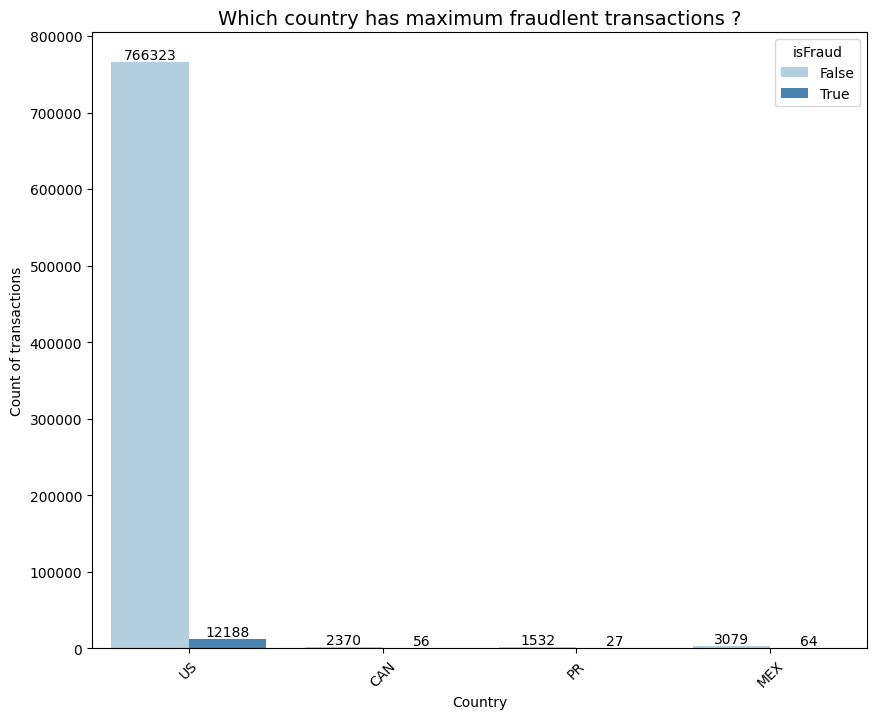

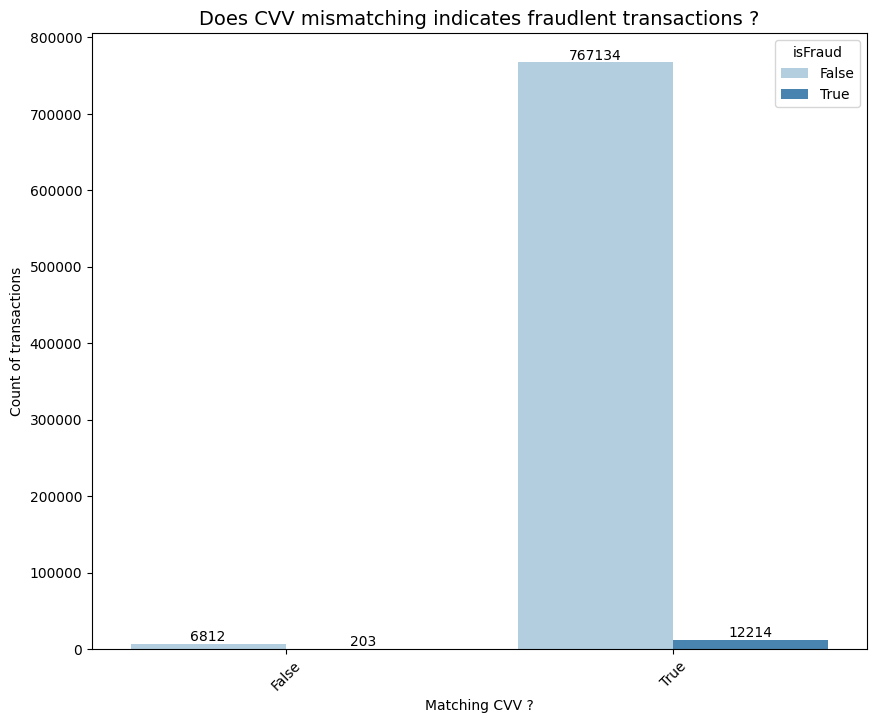

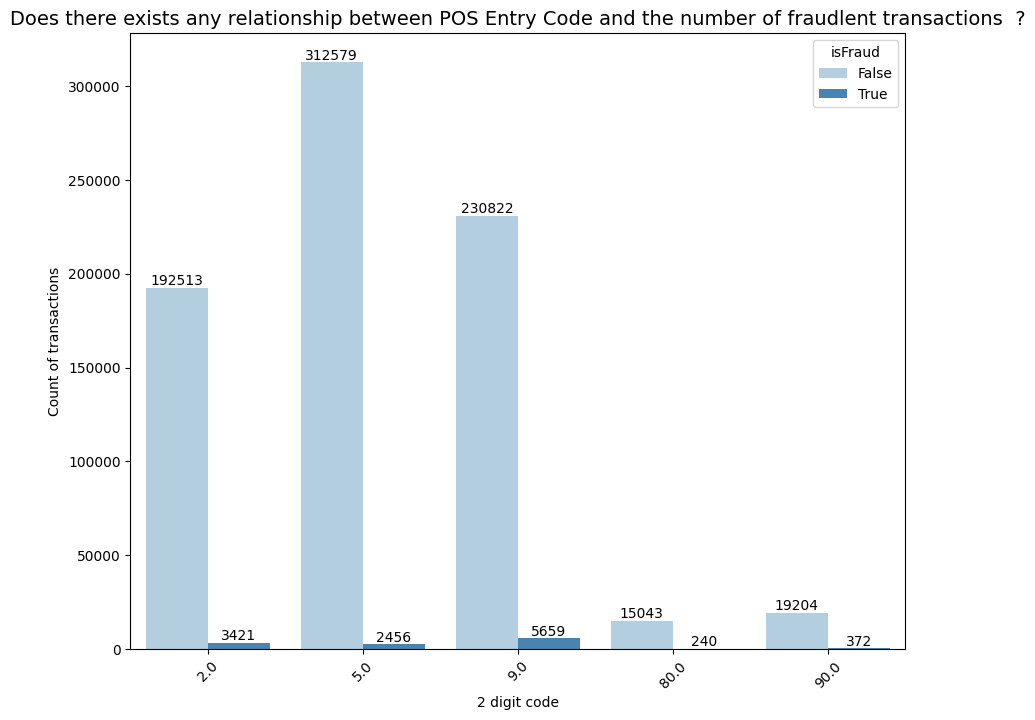

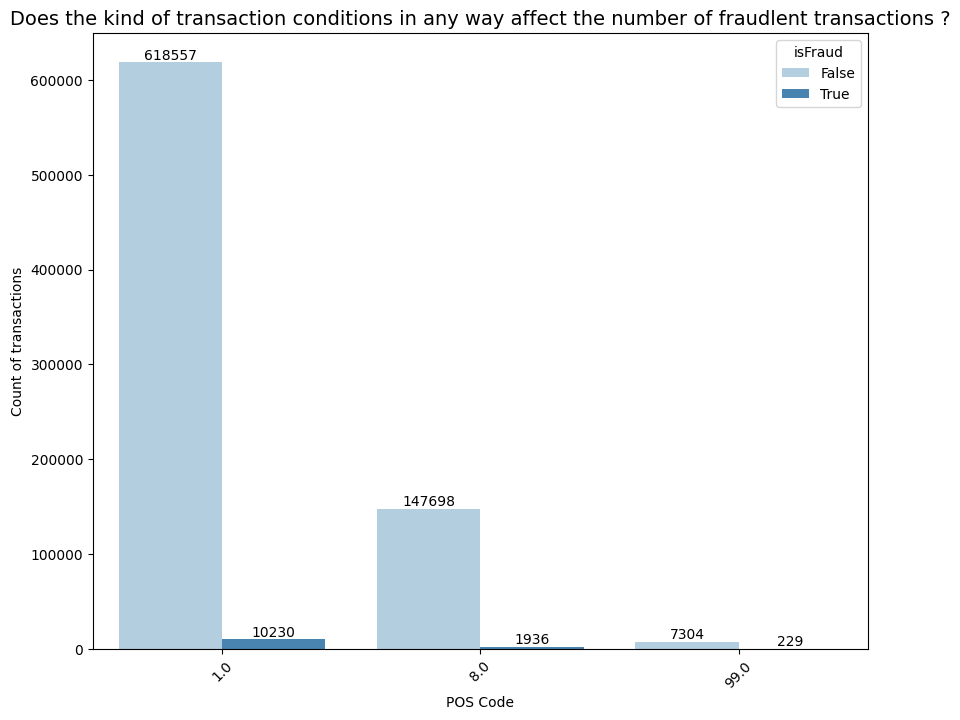

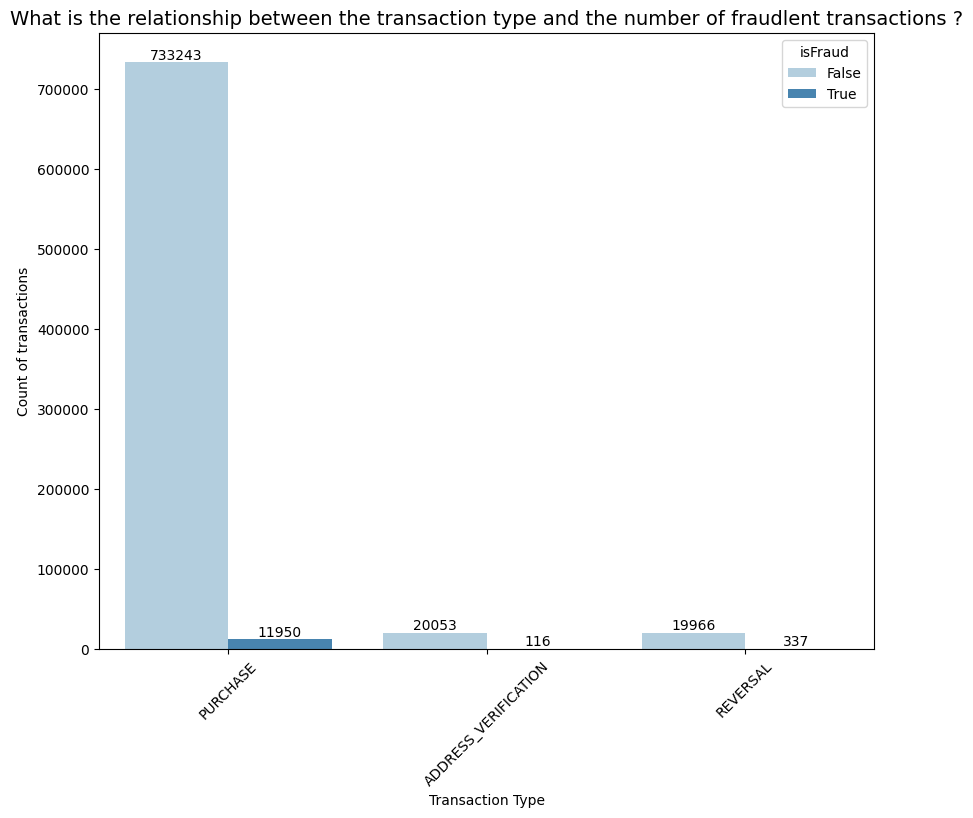

In [ ]:
def plot_graph_fraud(var,xlabel,ylabel,title,hue,df):    
    plt.figure(figsize=(10,8))
    fig = sns.countplot(data=df, x=var,palette='Blues',hue=hue)
    fig.bar_label(fig.containers[0])
    fig.bar_label(fig.containers[1])
    plt.ylabel(ylabel,fontsize=10)
    plt.xlabel(xlabel,fontsize=10)
    plt.title(title,fontsize=14)
    plt.xticks(rotation=45)
    plt.show()
    
plot_graph_fraud('isFraud','Is Fraud ?','Count of transactions','How often the fraud occurs depending on whether the transaction is online or offline (in person) ?','cardPresent',df)
plot_graph_fraud('merchantCountryCode','Country','Count of transactions','Which country has maximum fraudlent transactions ?','isFraud',df)
plot_graph_fraud('matching cvv','Matching CVV ?','Count of transactions','Does CVV mismatching indicates fraudlent transactions ?','isFraud',df)

# This two-digit code identifies the actual method used to enter the cardholder account number and card expiration date. 
# This code specifies whether the entire magnetic stripe is included in an authorization request
plot_graph_fraud('posEntryMode','2 digit code','Count of transactions','Does there exists any relationship between POS Entry Code and the number of fraudlent transactions  ?','isFraud',df)

# This field contains a code identifying transaction conditions at the point-of-sale or point-of-service. 
# For messages that follow an original request, this code identifies the type of processing being done.
plot_graph_fraud('posConditionCode','POS Code','Count of transactions','Does the kind of transaction conditions in any way affect the number of fraudlent transactions ?','isFraud',df)

plot_graph_fraud('transactionType','Transaction Type','Count of transactions','What is the relationship between the transaction type and the number of fraudlent transactions ?','isFraud',df)


#### Studying the relationship between the number of fraudlent transactions and customer ID, merchant name

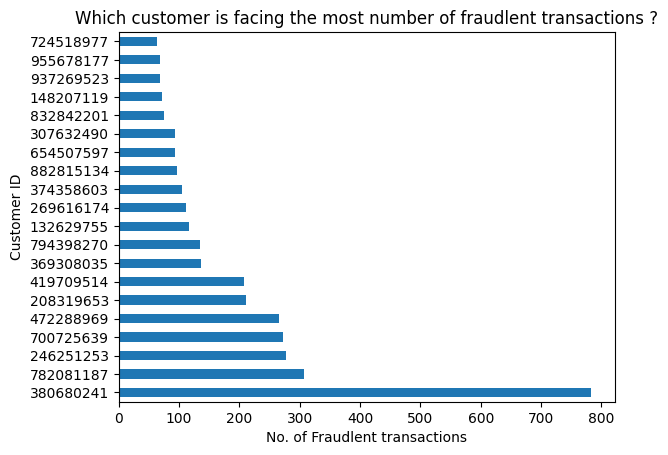

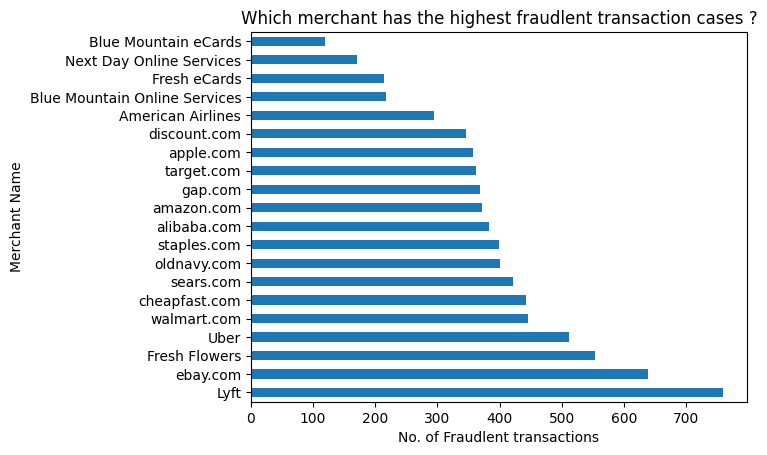

In [ ]:
def barplot(var, xlabel, ylabel, title):
    
    df.query('isFraud==True')[var].value_counts(ascending=False)[:20].plot(kind='barh')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()
    
barplot('customerId', 'No. of Fraudlent transactions', 'Customer ID', 'Which customer is facing the most number of fraudlent transactions ?')
barplot('merchantName', 'No. of Fraudlent transactions', 'Merchant Name','Which merchant has the highest fraudlent transaction cases ?')

#### Since the number of numerical values are too large, BOXPLOT will give us a better vizualisation of numerical records and there distribution

##### Credit Limit has multimodal distribution. Most of the people have a credit limit of 5000, the minimum limit is 250 and the maximum is 50000.

##### Available money is right skewed. Most of the people have money less than 5000, which also verifies why so many people have less credit limit. Also, there are many people with available money more than 20000 accounting for higher credit limits.

##### The transaction amount is right skewed with a median of even less than 250. This was expected because us as general public don't make expensive transactions every day. Credit card is majorly used for smaller purchases and, hence the distribution.

##### The current balance for customers of Capital One is very low. The distribution is mainly right skewed with a few people having balance greater than 20000.

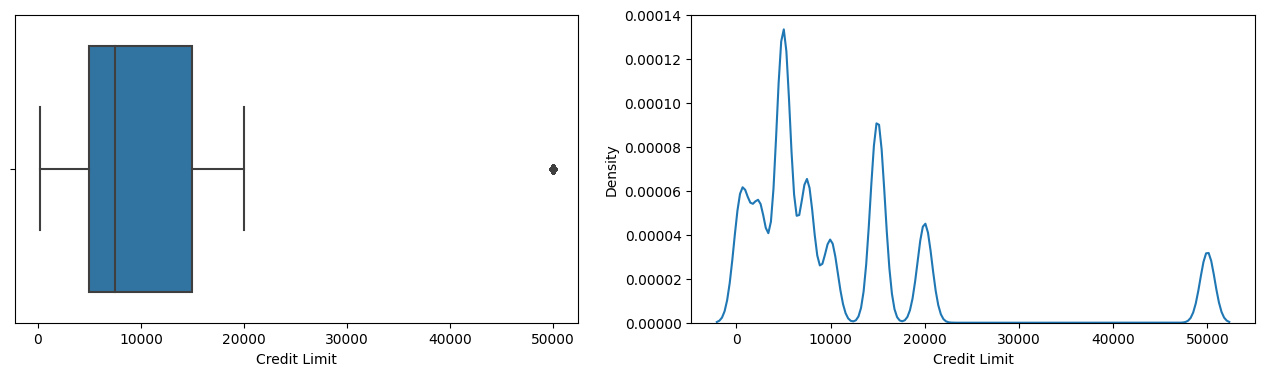

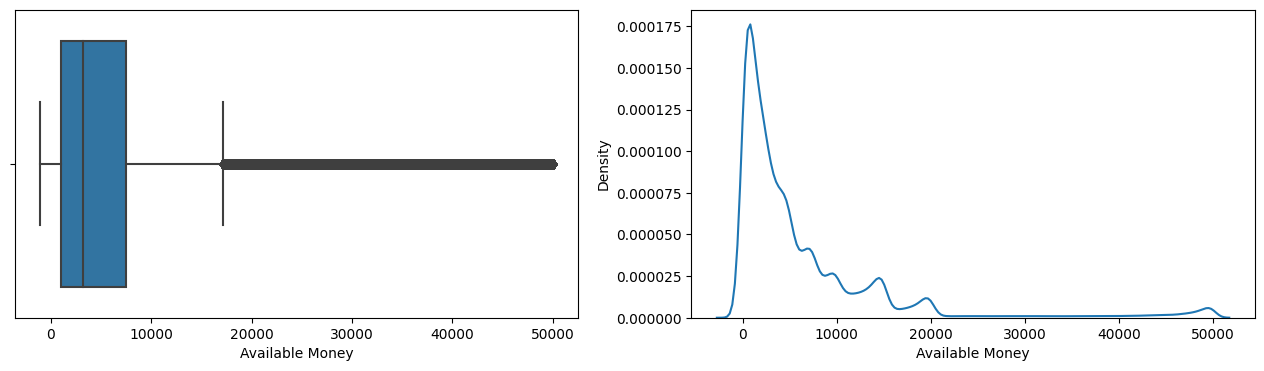

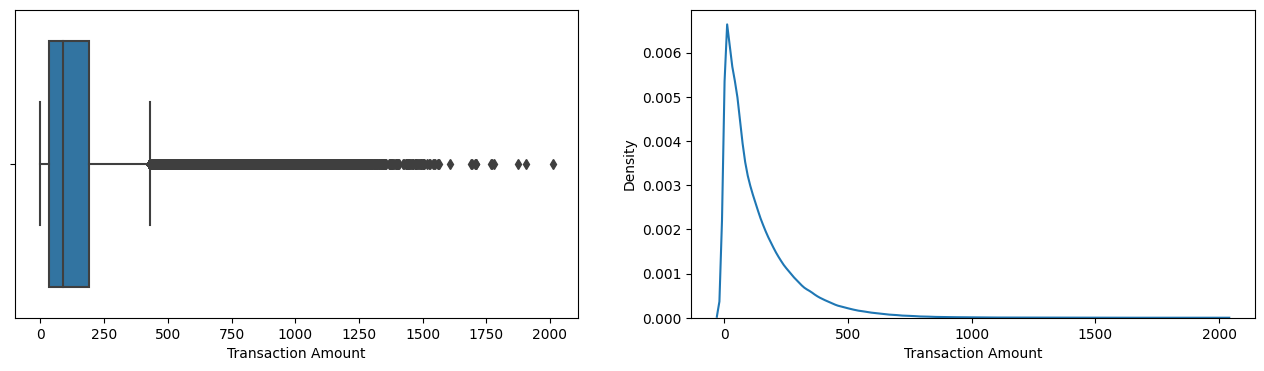

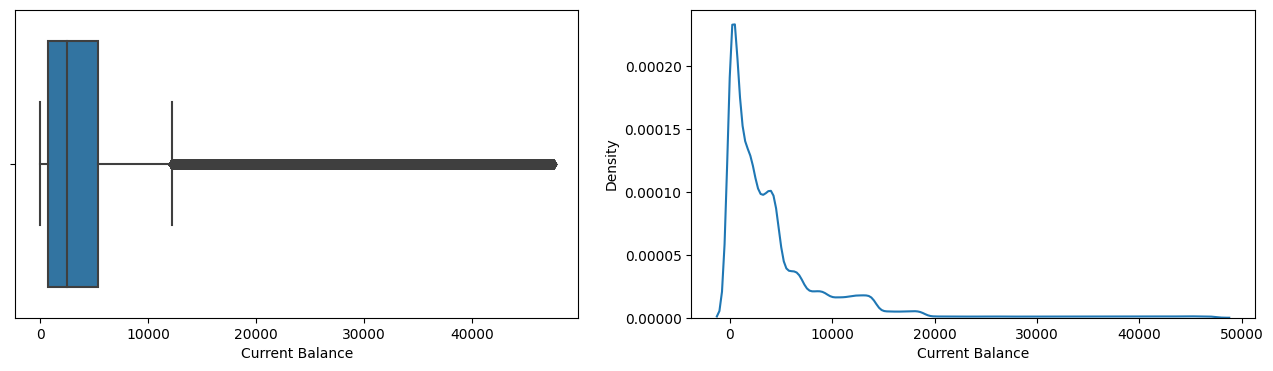

In [ ]:
def num_plots(var,xlabel):

    fig, ax = plt.subplots(1,2,figsize =(16,4))
    plt.subplot(1,2,1)
    sns.boxplot(df,x=var)
    plt.xlabel(xlabel)
    
    plt.subplot(1,2,2)
    sns.kdeplot(df,x=var)
    plt.xlabel(xlabel)
    plt.show()

num_plots('creditLimit','Credit Limit')
num_plots('availableMoney','Available Money')
num_plots('transactionAmount','Transaction Amount')
num_plots('currentBalance','Current Balance')

##### There is no primary key in the data that uniquely identifies a transaction. To solve this, we create a transaction code unique to every record/row in the dataframe. This will be helpful when we have to identify and remove duplicate transactions from the dataset.

In [ ]:
transaction_code = []
for i in range(len(df)):
    transaction_code.append('Tran'+str(i))

df['transactionCode'] = transaction_code

##### For Data Wrangling, a copy of the original dataset has been created. The old timestamp column ("transactionDateTime") consists of variable T and hence needs to be cleaned. The date and time values are extracted from the timestamp feature and concatenated together to form a new column.

In [ ]:
# creating a separate transactions dataframe
transactions = df.copy()

# extracting date and time from the timestamp
transactions['Dates'] = pd.to_datetime(df['transactionDateTime']).dt.date
transactions['Time'] = pd.to_datetime(df['transactionDateTime']).dt.time

# combining the dates and time to form a timestamp feature
transactions['timestamp'] = transactions['Dates'].astype(str) + ' ' + transactions['Time'].astype(str)

##### For detecting duplicate transactions, only the features that highlight the trasaction properties such as  transaction's time, amount, etc. and help in identifying it uniquely are retained. Keeping unnecessary variables such as 'POSEntrymode', 'CVV' etc., don't provide any valuable information and hence filtered out.

In [ ]:
transactions = transactions[['customerId','transactionCode','transactionType','merchantName','transactionAmount','timestamp']]
transactions.shape

(786363, 6)

#### REVERSAL TRANSACTIONS

##### The transaction amount for each of the 'ADDRESS_VERIFICATION' transactions equals to 0. This type of transaction will be dealt after a few steps. 

In [ ]:
df_add_ver = transactions[transactions['transactionType']=='ADDRESS_VERIFICATION']
df_add_ver[df_add_ver['transactionAmount']!=0].shape[0]

0

##### For determining the reversal transactions, we focus only upon the 'PURCHASE' and 'REVERSAL' transaction types. 
##### 'df_pur_rev' refers to the dataframe that consists of transactions corresponding to PURCHASE and REVERSAL transaction type.

In [ ]:
transactions_type = ['PURCHASE','REVERSAL']
df_pur_rev = transactions[transactions['transactionType'].isin(transactions_type)]
df_pur_rev.transactionType.unique()

array(['PURCHASE', 'REVERSAL'], dtype=object)

#### A transaction is considered to be a REVERSAL for a given PURCHASE transaction only when -
##### 1. Both transactions are processed for the same customers, i.e. the same customer id and,
##### 2. Both transactions are performed for the same merchant and,
##### 3. Both transactions are performed for same amount.

##### We group transactions which have similar customer id, merchant name, and transaction amount. Only those sub data frames are retained which have atleast one reversal transaction in it. 

##### There can be a sub dataframe of multiple swipes for a transaction but it will be retained only if we have one reversal transaction for the group. This is achieved by counting the number of unique values for transaction type column.

##### First transaction : PURCHASE, Second transaction : REVERSAL

In [ ]:
df_reversal = df_pur_rev.groupby(['customerId','merchantName','transactionAmount']).filter(lambda x: x['transactionType'].nunique()>1)

##### As we can see from the dataframe, there are many reversal transactions which are done immediately after the purchase while a few reversals are done after a certain time duration. Example - Index 38 (Purchase) and 39 (Reversal) performed consecutively within 4 minutes.

In [ ]:
df_reversal.head()

,customerId,transactionCode,transactionType,merchantName,transactionAmount,timestamp
38,574788567,Tran38,PURCHASE,Convenient Tire,215.13,2016-05-24 01:35:33
39,574788567,Tran39,REVERSAL,Convenient Tire,215.13,2016-05-24 01:38:03
100,924729945,Tran100,PURCHASE,discount.com,168.57,2016-10-04 04:20:04
101,924729945,Tran101,REVERSAL,discount.com,168.57,2016-10-19 14:01:45
113,984504651,Tran113,PURCHASE,1st Sandwitch Bar #801388,83.64,2016-01-06 04:08:06


##### There are 17777 reversals for 17777 purchases, i.e. each of the 17777 purchase in the data has a reversal. 
##### But, the reason why we are seeing 18133 purchases is that there are multiple swipes for some of the purchases but only 1 corresponding reversal.

In [ ]:
df_reversal['transactionType'].value_counts()

PURCHASE    18133
REVERSAL    17777
Name: transactionType, dtype: int64

##### Calculating the sum of these 17777 transactions. Also, as per the question, the first transaction needs to be considered as normal and we only need to calculate the sum of transaction amount for the reversed transactions.

In [ ]:
print('Sum of these 17777 reversal transactions =',df_reversal[df_reversal['transactionType']=='REVERSAL']['transactionAmount'].sum())

Sum of these 17777 reversal transactions = 2667342.39


In [ ]:
# number of reversal transactions 
df_pur_rev[df_pur_rev['transactionType']=='REVERSAL'].shape[0]

20303

##### As seen, the number of reversal transactions present in our data are 20303. We have found the purchase for 17777 of them. Now, we will understand how to extract the purchases for the remaining 20303 - 17777 = 2526 reversal transactions

##### Calculating the number of transactions that don't have any corresponding PURCHASE transaction. As expected, the count should come equal to 2526.

In [ ]:
# transactions with no purchase and only reversal
df_no_pur = df_pur_rev.groupby(['customerId','merchantName','transactionAmount']).filter(lambda x : x['transactionType'].nunique()<2 and 'REVERSAL' in x['transactionType'].unique())

In [ ]:
df_no_pur.shape

(2526, 6)

##### Now, comes into picture the 'ADDRESS_VERIFICATION' transaction type. Before this we only considered the PURCHASE transaction type. But it might be possible, that the first transaction was from the 'ADDRESS_VERIFICATION' type rather than PURCHASE type. 

##### First transaction : ADDRESS_VERIFICATION, Second transaction : REVERSAL

In [ ]:
# finding those transactions where transaction amount is 0
df_zero_amnt = df_no_pur[df_no_pur['transactionAmount']==0]

##### As seen before, one characterstic for 'Address verification' purchase is that their corresponding transaction amount is zero. So, for first transaction to be of such type, its amount should also be zero.

##### So, out of 2526 transactions that don't have a PURCHASE transaction, 568 have zero transaction amount

##### Now, a check needs to be done to understand how many of these 568 transactions actually have a corresponding first purchase in the 'ADDRESS VERIFICATION' purchase type.

##### For this, a LEFT JOIN is performed on the 2 dataframes and as we see all the records have joined!

##### Hence, we have deduced the first transaction of these 568 reversed transactions.

In [ ]:
# performing left join
df_join = pd.merge(df_zero_amnt, df_add_ver, on=['customerId','merchantName','transactionAmount'], how='left')

# no nulls
# all records joined properly
df_join.isna().sum()

customerId           0
transactionCode_x    0
transactionType_x    0
merchantName         0
transactionAmount    0
timestamp_x          0
transactionCode_y    0
transactionType_y    0
timestamp_y          0
dtype: int64

##### Sum of transaction amount for these 568 transactions = 0 since these are of purchase type 'ADDRESS VERIFICATION'.
##### Now for the remaining 20303 - 17777 - 568 = 1958 transactions, we can't find the corresponding purchase type. 
##### This could be possible because of many possible reasons such as errors with data collection, data quality, etc.

##### So, total sum for reversal transactions = 2667342.39 + 0 = 2667342.39
##### No. of reversal transactions = 17777 + 568 = 2345. As directed in the question, we have not included the first transactions in these calculations.

#### Removing Duplicate (Reversal) Transactions. 
##### As mentioned, the first transaction should be considered normal and hence only the second transaction or the reversed transaction should be removed. Here, we will identify such transactions with the help of transaction code that we created earlier.

In [ ]:
# collecting all the transaction codes corresponding to reversal transaction type
transaction_code_remove_1 = df_reversal.query('transactionType=="REVERSAL"')['transactionCode']
transaction_code_remove_2 = df_no_pur.query('transactionAmount==0')['transactionCode']

# removing the transaction codes corresponding to the reversal transactions type
df_no_reverse = df_pur_rev[~(df_pur_rev['transactionCode'].isin(transaction_code_remove_1))]
df_no_reverse = df_no_reverse[~(df_pur_rev['transactionCode'].isin(transaction_code_remove_2))]

<ipython-input-32-068cdbaa12cd>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_no_reverse = df_no_reverse[~(df_pur_rev['transactionCode'].isin(transaction_code_remove_2))]


In [ ]:
# dimensions of dataframe with reversal transactions removed
df_no_reverse.shape

(747151, 6)

#### MULTISWIPE TRANSACTIONS

In [ ]:
df_mst = df_no_reverse.copy()
df_mst.head()

,customerId,transactionCode,transactionType,merchantName,transactionAmount,timestamp
0,737265056,Tran0,PURCHASE,Uber,98.55,2016-08-13 14:27:32
1,737265056,Tran1,PURCHASE,AMC #191138,74.51,2016-10-11 05:05:54
2,737265056,Tran2,PURCHASE,Play Store,7.47,2016-11-08 09:18:39
3,737265056,Tran3,PURCHASE,Play Store,7.47,2016-12-10 02:14:50
4,830329091,Tran4,PURCHASE,Tim Hortons #947751,71.18,2016-03-24 21:04:46


#### We groupby data on Customer Id, merchant name and then sort the transactions within each sub group on the basis of timestamp.

In [ ]:
df_mst = df_mst.groupby(['customerId','merchantName']).apply(lambda x: x.sort_values(by='timestamp',ascending=True))

# dropping indexes 
df_mst = df_mst.reset_index(drop=True)

In [ ]:
df_mst.head()

,customerId,transactionCode,transactionType,merchantName,transactionAmount,timestamp
0,100088067,Tran541917,PURCHASE,1st BBQ,200.12,2016-04-08 19:56:36
1,100088067,Tran541962,PURCHASE,1st Pub,95.11,2016-11-09 07:26:06
2,100088067,Tran541920,PURCHASE,1st Sandwitch Bar #758805,5.26,2016-05-06 02:54:01
3,100088067,Tran541904,PURCHASE,34th BBQ #412895,141.60,2016-02-03 04:48:54
4,100088067,Tran541925,PURCHASE,AMC #191138,304.15,2016-06-03 18:50:55


##### Multiswipe transactions have with similar customer Id, merchant name, transaction amount and they are performed in a very close time proximity to each other, i.e., the time difference between there respective timestamp is very less. 

##### First, we group the dataset on customer Id, merchant name, and transaction amount. Post that, the smallest timestamp, i.e. the transaction which was performed first is selected from each of the sub group. This timestamp serves as the base and every other timestamo in the group is compared from this base time. If the time difference between the base and other timestamps is less than 60 sec, we say that it is a multi swipe transaction.

##### Basically, the assumption here is that the time difference between multiswipe transactions will be less than 60 seconds. I have taken this limit based on my experience of using credit cards till now. 

In [ ]:
from datetime import datetime

arr = []
date_format_str = '%Y-%m-%d %H:%M:%S'

# using a initial timestamp
initial = datetime.strptime('2016-01-01 00:01:00', date_format_str)

# calculating the total time in seconds
for i in df_mst['timestamp']:
    current = datetime.strptime(i, date_format_str)
    arr.append((current-initial).total_seconds())
    
# adding a new column in the dataframe
df_mst['timeDifference']=arr

##### The transactions are said to be multiswipe when the time difference between the first transaction and any other transaction is less than 60 sec
##### Greater than zero condition ensures that the base transaction itself isn't considered as a multiswipe transaction. 

In [ ]:
multi_swipe_bool = df_mst.groupby(by=['customerId','merchantName','transactionAmount']).apply(lambda g: ((g['timeDifference'] - g['timeDifference'].min())>0) & ((g['timeDifference'] - g['timeDifference'].min())<60)).reset_index(drop=True)

##### Adding a multiswipe boolean column in the dataframe

In [ ]:
df_mst['multiSwipe']=multi_swipe_bool

In [ ]:
print('Count of multiswipe transactions =',df_mst.query('multiSwipe==True').shape[0])
print('Sum of multiswipe transactions =', df_mst.query('multiSwipe==True')['transactionAmount'].sum())

Count of multiswipe transactions = 2245
Sum of multiswipe transactions = 334149.8


#### Removing duplicate transactions by extracting the transaction codes for the multi swipe transactions.

In [ ]:
transaction_code_remove_3 = df_mst.query('multiSwipe==True')['transactionCode']

In [ ]:
# removing the purchase-reversal duplicate type transactions
df = df[~(df['transactionCode'].isin(transaction_code_remove_1))]

# removing the address verification-reversal duplicate type transactions
df = df[~(df['transactionCode'].isin(transaction_code_remove_2))]

# removing the multiswipe transactions 
df = df[~(df['transactionCode'].isin(transaction_code_remove_3))]

In [ ]:
# final shape of the dataframe 
df.shape

(765773, 25)

#### Studying the correlation between various features for building machine learning model using HEAT MAP

##### There exists a strong correlation between the credit limit and current balance. This further validates the EDA we plotted earlier. Hence, one of these variables should be dropped before modeling ML models to avoid multicollinearity.
##### Available money exists in a strong correlation with the credit limit. 
##### The target vraible is most strongly correlated with the transaction amount. This could mean that the latter plays an important role in determining whether a transaction is fraudlent or not.
##### As can be seen, current Balance and credit limit are closely related to many other features in the dataset. A darker color of the square box indicates stronger correlation denoted by r.

<ipython-input-44-4e16de2f8b6a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),cmap='Blues')


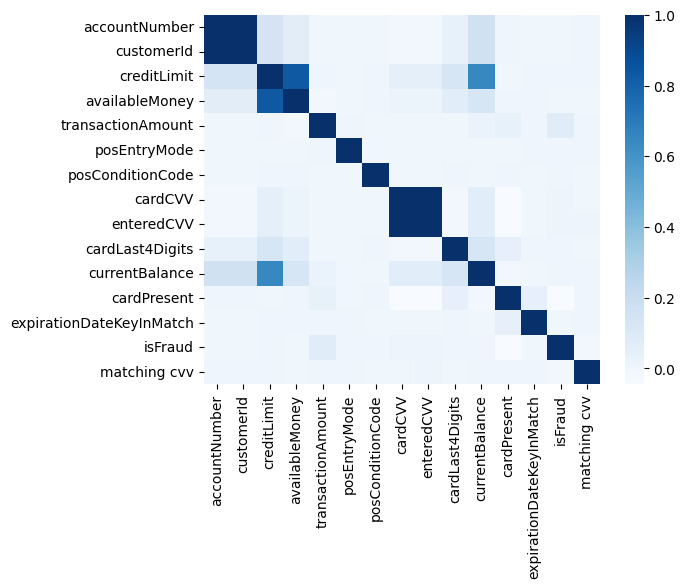

In [ ]:
sns.heatmap(df.corr(),cmap='Blues')
plt.show()



Testing the statistical significance of the correlation matrix to test the reliability



In [ ]:
import numpy as np
from scipy.stats import chi2_contingency

#corr_matrix = np.corrcoef(df.T)

In [ ]:
# printing first few records of the dataframe
df.head()

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,...,cardCVV,enteredCVV,cardLast4Digits,transactionType,currentBalance,cardPresent,expirationDateKeyInMatch,isFraud,matching cvv,transactionCode
0,737265056,737265056,5000.0,5000.0,2016-08-13T14:27:32,98.55,Uber,US,US,2.0,...,414,414,1803,PURCHASE,0.0,False,False,False,True,Tran0
1,737265056,737265056,5000.0,5000.0,2016-10-11T05:05:54,74.51,AMC #191138,US,US,9.0,...,486,486,767,PURCHASE,0.0,True,False,False,True,Tran1
2,737265056,737265056,5000.0,5000.0,2016-11-08T09:18:39,7.47,Play Store,US,US,9.0,...,486,486,767,PURCHASE,0.0,False,False,False,True,Tran2
3,737265056,737265056,5000.0,5000.0,2016-12-10T02:14:50,7.47,Play Store,US,US,9.0,...,486,486,767,PURCHASE,0.0,False,False,False,True,Tran3
4,830329091,830329091,5000.0,5000.0,2016-03-24T21:04:46,71.18,Tim Hortons #947751,US,US,2.0,...,885,885,3143,PURCHASE,0.0,True,False,False,True,Tran4


In [ ]:
# unique customers who faced fraudlent transactions
df.query('isFraud == True')['customerId'].nunique()

2075

In [ ]:
# fraud transactions
df_fraud_trans = df[df['isFraud'] == True] 

In [ ]:
# true transactions
df_true_trans = df[df['isFraud'] == False]

In [ ]:
# respective shapes of the dataframe
df_fraud_trans.shape, df_true_trans.shape

((12065, 25), (753708, 25))

In [ ]:
# chosing a random sample of data from the true transactions
# since this is a random sample, it will be a true representation of population
df_true_sample = df_true_trans.sample(frac=0.2,random_state=42) 

In [ ]:
# resetting the indexes so as to combine the two dataframes
df_true_sample.reset_index(drop=True,inplace=True)
df_fraud_trans.reset_index(drop=True,inplace=True)

In [ ]:
# new dataframe 
df_new_fraud = pd.concat([df_true_sample, df_fraud_trans], axis=0)

In [ ]:
# shape of the new sampled dataframe
df_new_fraud.shape

(162807, 25)

##### Based on EDA and heatmap, we have considered following columns for the modeling process

In [ ]:
df_fraud = df_new_fraud[['creditLimit','merchantCountryCode','transactionAmount','posEntryMode','posConditionCode','merchantCategoryCode','transactionType','cardPresent','matching cvv','isFraud']]

In [ ]:
df_fraud.reset_index(drop=True,inplace=True)

#### Filling the none values with the most mode of the respective feature

In [ ]:
df_fraud['merchantCountryCode'] = df_fraud['merchantCountryCode'].fillna('US')
df_fraud['transactionType'] = df_fraud['transactionType'].fillna('PURCHASE')

<ipython-input-57-28e465a22925>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fraud['merchantCountryCode'] = df_fraud['merchantCountryCode'].fillna('US')
<ipython-input-57-28e465a22925>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fraud['transactionType'] = df_fraud['transactionType'].fillna('PURCHASE')


##### LABEL ENCODING

##### Converting categorical variable in the dataset to numerical values


In [ ]:
def cat_to_num(var):
    df_fraud[var] = df_fraud[var].astype('category')
    df_fraud[var] = df_fraud[var].cat.codes
    
cat_to_num('merchantCategoryCode')
cat_to_num('posEntryMode')
cat_to_num('posConditionCode')
cat_to_num('isFraud')

<ipython-input-58-115bcfa4a6fa>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fraud[var] = df_fraud[var].astype('category')
<ipython-input-58-115bcfa4a6fa>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fraud[var] = df_fraud[var].cat.codes
<ipython-input-58-115bcfa4a6fa>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/s

##### ONE HOT ENCODING

In [ ]:
# creating a variable to carry out the encoding calculations
from sklearn.preprocessing import OneHotEncoder

data=df_fraud

# resetting the indexes
data=data.reset_index(drop=True)

# initializing the one hot encoder
enc = OneHotEncoder(sparse=False)

# categorical columns for encoding
columns_one_hot_encode = ['creditLimit','merchantCountryCode','transactionType','cardPresent','matching cvv']

# performing data fit and transform for the categorical columns
df_encoded = pd.DataFrame(enc.fit_transform(data.loc[:,columns_one_hot_encode]))

# creating new feature names for the columns that will be created from encoding above
df_encoded.columns = enc.get_feature_names_out(columns_one_hot_encode)

# dropping the original categorical column from the dataset
data.drop(columns_one_hot_encode ,axis=1, inplace=True)

df_encoded = df_encoded.reset_index(drop=True)

# combining
df_fraud_encoded = pd.concat([df_encoded, data], axis=1)

# data used for ML modeling
df_ml = df_fraud_encoded.copy()

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
df_ml.head()

,creditLimit_250.0,creditLimit_500.0,creditLimit_1000.0,creditLimit_2500.0,creditLimit_5000.0,creditLimit_7500.0,creditLimit_10000.0,creditLimit_15000.0,creditLimit_20000.0,creditLimit_50000.0,...,transactionType_REVERSAL,cardPresent_False,cardPresent_True,matching cvv_False,matching cvv_True,transactionAmount,posEntryMode,posConditionCode,merchantCategoryCode,isFraud
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.00,0,0,11,0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,181.34,2,0,17,0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,46.18,1,0,11,0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,109.62,0,0,3,0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,30.60,1,1,5,0


In [ ]:
# to-do
# over/under sampling
# standardize transaction amount
# pca
# train - test split
# modeling

In [ ]:
df_ml.columns

Index(['creditLimit_250.0', 'creditLimit_500.0', 'creditLimit_1000.0',
       'creditLimit_2500.0', 'creditLimit_5000.0', 'creditLimit_7500.0',
       'creditLimit_10000.0', 'creditLimit_15000.0', 'creditLimit_20000.0',
       'creditLimit_50000.0', 'merchantCountryCode_CAN',
       'merchantCountryCode_MEX', 'merchantCountryCode_PR',
       'merchantCountryCode_US', 'transactionType_ADDRESS_VERIFICATION',
       'transactionType_PURCHASE', 'transactionType_REVERSAL',
       'cardPresent_False', 'cardPresent_True', 'matching cvv_False',
       'matching cvv_True', 'transactionAmount', 'posEntryMode',
       'posConditionCode', 'merchantCategoryCode', 'isFraud'],
      dtype='object')



##### Z-score normalization on the continous variables before proceeding with dimensionality reducting and modelling

Continous Variables:
1. transactionAmount


In [ ]:
def z_score_norm(column):
  return (column-column.mean())/column.std()

df_ml_norm = df_ml.copy() #sets aside a copy of non-normalized data frame 

df_ml_norm['transactionAmount_norm'] = z_score_norm(df_ml['transactionAmount'])
df_ml_norm = df_ml_norm.drop(columns=['transactionAmount'])
print(df_ml_norm.columns)

Y = df_ml_norm['isFraud'] # labels of the dataframe 
X = df_ml_norm.drop(columns=['isFraud'])


Index(['creditLimit_250.0', 'creditLimit_500.0', 'creditLimit_1000.0',
       'creditLimit_2500.0', 'creditLimit_5000.0', 'creditLimit_7500.0',
       'creditLimit_10000.0', 'creditLimit_15000.0', 'creditLimit_20000.0',
       'creditLimit_50000.0', 'merchantCountryCode_CAN',
       'merchantCountryCode_MEX', 'merchantCountryCode_PR',
       'merchantCountryCode_US', 'transactionType_ADDRESS_VERIFICATION',
       'transactionType_PURCHASE', 'transactionType_REVERSAL',
       'cardPresent_False', 'cardPresent_True', 'matching cvv_False',
       'matching cvv_True', 'posEntryMode', 'posConditionCode',
       'merchantCategoryCode', 'isFraud', 'transactionAmount_norm'],
      dtype='object')


## Dimensionality Check 

## Dimensionality Reduction Using PCA

Determine optimal number of clusters using the Elbow Method

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Text(0.5, 1.0, 'Elbow Plot to Determine Optimal # of Clusters')

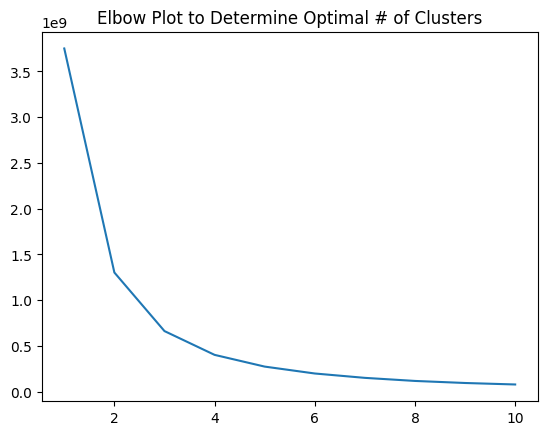

In [ ]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt

X = df_ml[df_ml.columns.difference(['isFraud'])]
Y = df_ml['isFraud']

wcss = []
for i in range(1, 11):
    clustering = KMeans(n_clusters=i, init='k-means++', random_state=42)
    clustering.fit(X)
    wcss.append(clustering.inertia_)

ks = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
sns.lineplot(x = ks, y = wcss)
plt.title('Elbow Plot to Determine Optimal # of Clusters')

In [ ]:
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

Create PC1 vs PC2 plot and color points based on fraud status; a clear separation indicates fraud is captured in the reduced features

Text(0.5, 1.0, 'PC1 vs PC2 Plot')

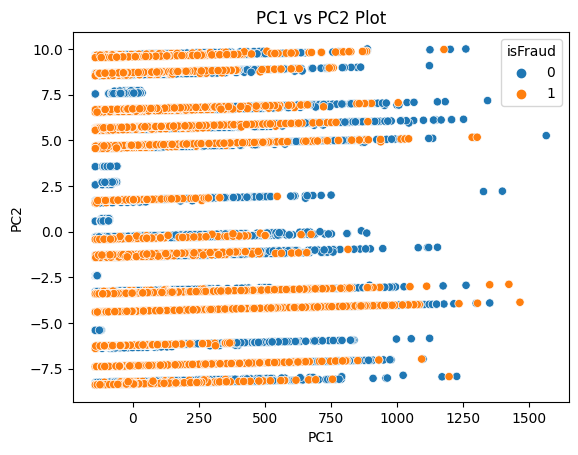

In [ ]:
X_reduced_df = pd.DataFrame(X_reduced)
X_reduced_df = X_reduced_df.rename(columns={0:'PC1',1:'PC2'})
sns.scatterplot(data=X_reduced_df,x='PC1',y='PC2',hue=Y)
plt.title("PC1 vs PC2 Plot")

### Principle Component Analysis

Following the preprocessing steps explained during the EDA phase such as one hot encoding, filling nan values etc., our dataset has dimensions d=25. Prior to choosing an optimal classifier to train on this dataset, it would be best to analyze the contribution of each of these components by performing an unsupervised technique known as Principal Component Analysis (PCA). This technique discovers an orthonormal basis for the original dataset with it's d-dimensions by aiming to seek those orthonormal basis that try to diagonalize the co-variance matrix of the dimensions i.e., reduces correlation between the variables that may be redundant!



Percentage of variance of the original dataset captured after PCA: 100.0 %

Number of components that capture around 97% of the variance in the original dataset with 26 components: 4


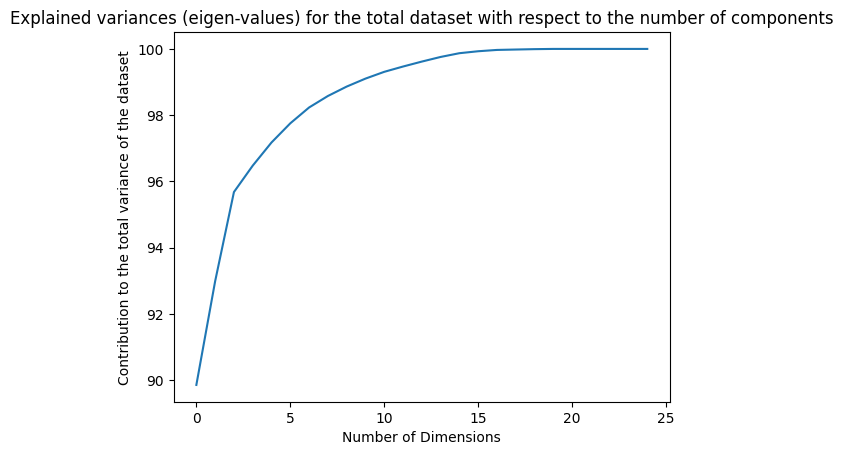

In [ ]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X)

eigenvalues,eigenvectors = pca.explained_variance_,pca.components_

print(f"Percentage of variance of the original dataset captured after PCA: {sum(pca.explained_variance_ratio_)*100} %\n")

eigenvals_cum = np.cumsum(pca.explained_variance_ratio_*100)

index = np.where(np.logical_and(eigenvals_cum >= 97,eigenvals_cum < 98))
print(f"Number of components that capture around 97% of the variance in the original dataset with {df_ml_norm.shape[1]} components: {index[0][0]}")


plt.plot(eigenvals_cum)
plt.xlabel('Number of Dimensions')
plt.ylabel('Contribution to the total variance of the dataset')
plt.title('Explained variances (eigen-values) for the total dataset with respect to the number of components')
plt.show()

From the above plot, we can see that if we reduced the dimensionality of the dataset based on the first 6 principal components, our dimensionality of the dataset will reduce from 26 to 5 while preserving 97% of the total variation in the dataset.

In [ ]:
# Reducing dimensionality:

pca = PCA(n_components = index[0][0]+1)
pca.fit(X)
df_ml_pca = pca.transform(X)

print(f"Dimensions reduced to {df_ml_pca.shape[1]} from {df_ml_norm.shape[1]}")

Dimensions reduced to 5 from 26


### Observing the impact of dimensionality reduction on a simple logistic 

---

regression model by comparing the accuracy of the original dataset with the reduced dimensionality dataset

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt


def roc_curve_plot(y_true,y_score):
  fpr, tpr, thresholds = roc_curve(y_true, y_score)
  plt.plot(fpr, tpr)
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('ROC Curve')
  plt.show()
  return None


def logistic_regression(X,Y,test_size=0.2,max_iter=1000,class_weight={0:1,1:1}):
  X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=42)
  clf = LogisticRegression(max_iter=max_iter,class_weight=class_weight)
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  acc = accuracy_score(y_test, y_pred)

  # Print the accuracy and the confusion matrix
  print(f"Accuracy: {acc*100}")

  # Getting precision score
  prec_score = precision_score(y_test,y_pred,pos_label=1)
  rec_score = recall_score(y_test,y_pred,pos_label=1)
  f1 = f1_score(y_test,y_pred,pos_label=1)

  print(f"Precision: {prec_score}\nRecall: {rec_score}\nF1 Score: {f1}")
  
  roc_curve_plot(y_test,y_pred)

  return y_pred

Logistic Regression on original dimensions:

Accuracy: 92.5649530127142
Precision: 0.21428571428571427
Recall: 0.0037546933667083854
F1 Score: 0.007380073800738006


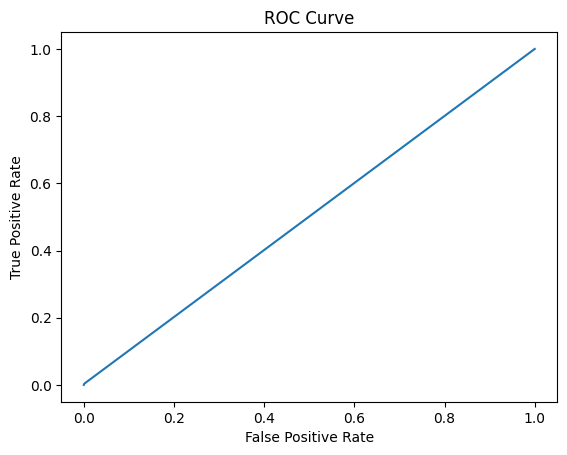

_____________________________________________

Logistic Regression after PCA:

Accuracy: 92.574166206007
Precision: 0.24390243902439024
Recall: 0.004171881518564873
F1 Score: 0.008203445447087778


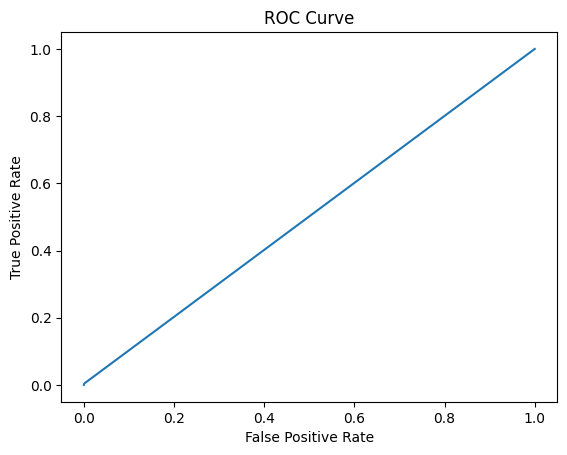

_____________________________________________



In [ ]:
print('Logistic Regression on original dimensions:\n')
y_base_d = logistic_regression(X,Y,test_size=0.2,max_iter=1000)
print('_____________________________________________\n')

print('Logistic Regression after PCA:\n')
y_base_pca = logistic_regression(df_ml_pca,Y,test_size=0.2,max_iter=1000)
print('_____________________________________________\n')


As evident from our simple logistic regression model, dimensionality reduction 


resulted in comparable accuracy, precision, recall and F1 score! This confirms our understanding that we have captured ~97% of the variance of our original dataset while reducing our number of dimensions from 25 to 5. 

Going forward, while this model is performing well in terms of absolute accuracy, we see low scores for precision **true positive/(true positive + false positive)**, recall **true positive/(true positive + negative)** and F1 score: **(precision*recall)/(precision + recall)**

Considering the positive class is the declaration of a fraudulent activity, we want to minimize false negatives i.e., cases of fraudulent activity that are classified as legitimate which were actually fraudulent. For this purpose, we need to focus on improving the recall score for our model! 

Before switching to a different learning algorithm that addresses this challenge, it would be best to try to visualize the data points to check for class separability and potential hyperplane boundary! As our original data has 26 dimensions, visualizing this is not intuitively possible. To bring the dimensionality down to a 2d plot that can be visualized, t-distributed stochastic neighbor embedding (T-SNE) is used!

###  t-distributed stochastic neighbor embedding (TSNE) Visualization

One possible reason that resulted in low precision and recall scores may be attributed to the non-linearity of the hyper-plane separating the two classes! As PCA produces canonical basis (linear mapping), it would be interesting to use a non-linear mapping to try and visualize our original dataset in 2 dimensions. 

t-SNE works by not only capturing the variance between clusters/classes but it also captures intra-cluster variations (variations within the same class) also. t-SNE primarily differs from PCA in the sense that it is a non-linear mapping or transformation. 

In [ ]:
#from sklearn.manifold import TSNE

#tsne = TSNE(n_components=2, random_state=42)
#X_tsne = tsne.fit_transform(X)

#plt.figure(figsize=(10, 8))
#plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=Y, cmap='viridis')
#plt.colorbar()
#plt.show()

# taking forever to run so idea dropped!

### Introducing the concept of an asymmetrical loss function (weighted logistic  regression)


Before moving on to other algorithms beyond logistic regression, it is worthwhile to try and implement an asymmetrical loss function by assigning class weights which penalizes false negatives more than false positives. The idea here is that we can afford a legitimate transaction being classified as fradulent but having a fradulent transaction being marked as legitimate is a bigger concern for us. 

Logistic Regression on original dimensions using weights:

Accuracy: 66.67280879552852
Precision: 0.12445589411033135
Recall: 0.5844806007509387
F1 Score: 0.2052145891313901


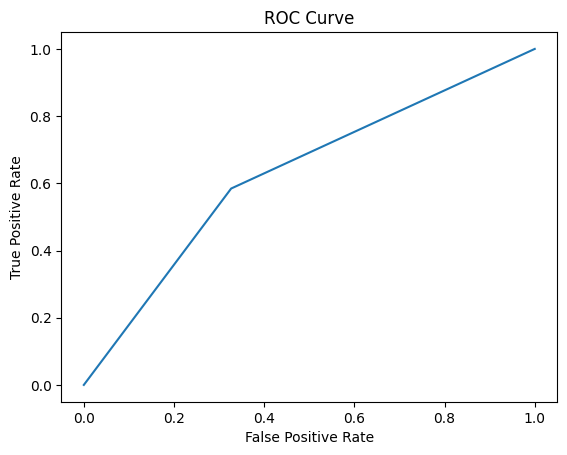

_____________________________________________

Logistic Regression after PCA using weights:

Accuracy: 68.19605675327068
Precision: 0.12881261076392128
Recall: 0.576136837713809
F1 Score: 0.21055038877877727


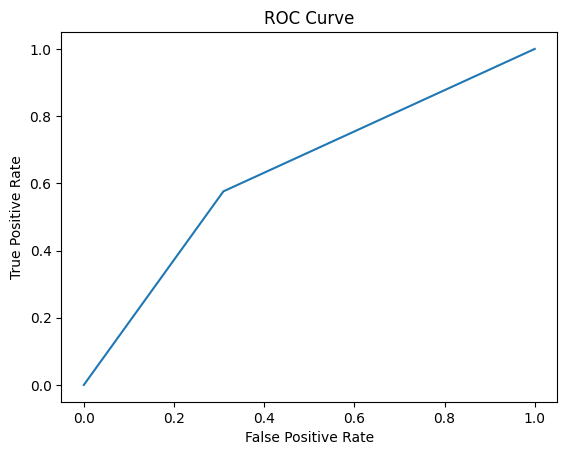

_____________________________________________



In [ ]:
print('Logistic Regression on original dimensions using weights:\n')
logistic_regression(X,Y,test_size=0.2,max_iter=1000,class_weight='balanced')
print('_____________________________________________\n')

print('Logistic Regression after PCA using weights:\n')
logistic_regression(df_ml_pca,Y,test_size=0.2,max_iter=1000,class_weight='balanced')
print('_____________________________________________\n')


**Having used balanced class weights (which sets the weights as being inversely proportional to the frequency of occurence for each class, we are seeing a decrease in test accuracy from 92% to 68% however, our recall has increased dramatically from 0.004 to 0.57. This indicates that our model is now performing better in classifying transactions as fradulent despite having a sheer class imbalance problem!

### Logistic Regression on complete dataset

In [ ]:
#Preparing dataset ML
from sklearn.decomposition import PCA

def model_prep(df,sample=True):

  print(f"The shape of the dataframe imported: {df.shape}")

  if sample:
    # fraud transactions
    df_fraud_trans = df[df['isFraud'] == True] 

    # true transactions
    df_true_trans = df[df['isFraud'] == False]

    # respective shapes of the dataframe
    df_fraud_trans.shape, df_true_trans.shape

    # chosing a random sample of data from the true transactions
    # since this is a random sample, it will be a true representation of population
    df_true_sample = df_true_trans.sample(frac=0.2,random_state=42) 

    # resetting the indexes so as to combine the two dataframes
    df_true_sample.reset_index(drop=True,inplace=True)
    df_fraud_trans.reset_index(drop=True,inplace=True)

    # new dataframe 
    df_new_fraud = pd.concat([df_true_sample, df_fraud_trans], axis=0)
  else:
    df_new_fraud = df # retaining all the original information of the dataset!


  # Based on EDA and heatmap, we have considered following columns for the modeling process
  df_fraud = df_new_fraud[['creditLimit','merchantCountryCode','transactionAmount','posEntryMode','posConditionCode','merchantCategoryCode','transactionType','cardPresent','matching cvv','isFraud']]
  df_fraud.reset_index(drop=True,inplace=True)

  # Filling the none values with the most mode of the respective feature
  df_fraud['merchantCountryCode'] = df_fraud['merchantCountryCode'].fillna('US')
  df_fraud['transactionType'] = df_fraud['transactionType'].fillna('PURCHASE')

  # LABEL ENCODING
  def cat_to_num(var):
      df_fraud[var] = df_fraud[var].astype('category')
      df_fraud[var] = df_fraud[var].cat.codes
      
  cat_to_num('merchantCategoryCode')
  cat_to_num('posEntryMode')
  cat_to_num('posConditionCode')
  cat_to_num('isFraud')

  # ONE HOT ENCODING
  # creating a variable to carry out the encoding calculations
  from sklearn.preprocessing import OneHotEncoder

  data=df_fraud

  # resetting the indexes
  data=data.reset_index(drop=True)

  # initializing the one hot encoder
  enc = OneHotEncoder(sparse=False)

  # categorical columns for encoding
  columns_one_hot_encode = ['creditLimit','merchantCountryCode','transactionType','cardPresent','matching cvv']

  # performing data fit and transform for the categorical columns
  df_encoded = pd.DataFrame(enc.fit_transform(data.loc[:,columns_one_hot_encode]))

  # creating new feature names for the columns that will be created from encoding above
  df_encoded.columns = enc.get_feature_names_out(columns_one_hot_encode)

  # dropping the original categorical column from the dataset
  data.drop(columns_one_hot_encode ,axis=1, inplace=True)

  df_encoded = df_encoded.reset_index(drop=True)

  # combining
  df_fraud_encoded = pd.concat([df_encoded, data], axis=1)

  # data used for ML modeling
  df_ml = df_fraud_encoded.copy()
  
  def z_score_norm(column):
    return (column-column.mean())/column.std()

  df_ml_norm = df_ml.copy() #sets aside a copy of non-normalized data frame 

  df_ml_norm['transactionAmount_norm'] = z_score_norm(df_ml['transactionAmount'])
  df_ml_norm = df_ml_norm.drop(columns=['transactionAmount'])
  
  Y = df_ml_norm['isFraud'] # labels of the dataframe 
  X = df_ml_norm.drop(columns=['isFraud'])
  return X,Y,df_ml_norm


X,Y,df_ml_norm = model_prep(df,sample=True) # put sample == True for undersampling the isFraud=False cases to 20%

The shape of the dataframe imported: (765773, 25)


<ipython-input-83-1a9a96fc9048>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fraud['merchantCountryCode'] = df_fraud['merchantCountryCode'].fillna('US')
<ipython-input-83-1a9a96fc9048>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fraud['transactionType'] = df_fraud['transactionType'].fillna('PURCHASE')
<ipython-input-83-1a9a96fc9048>:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the

Dimensions reduced to 6 from 26
Logistic Regression on original dimensions using weights:

Accuracy: 66.67280879552852
Precision: 0.12445589411033135
Recall: 0.5844806007509387
F1 Score: 0.2052145891313901


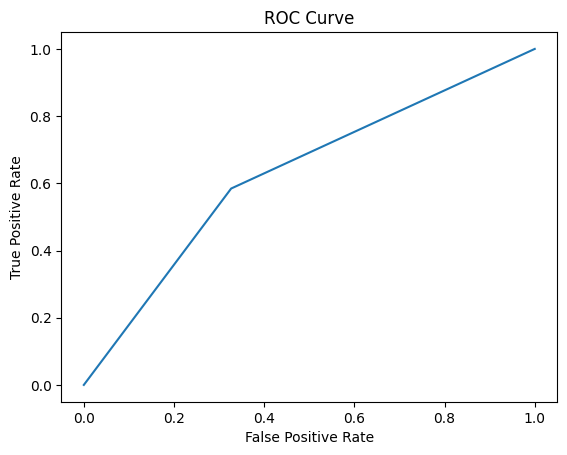

_____________________________________________

Logistic Regression after PCA using weights:

Accuracy: 68.19605675327068
Precision: 0.12881261076392128
Recall: 0.576136837713809
F1 Score: 0.21055038877877727


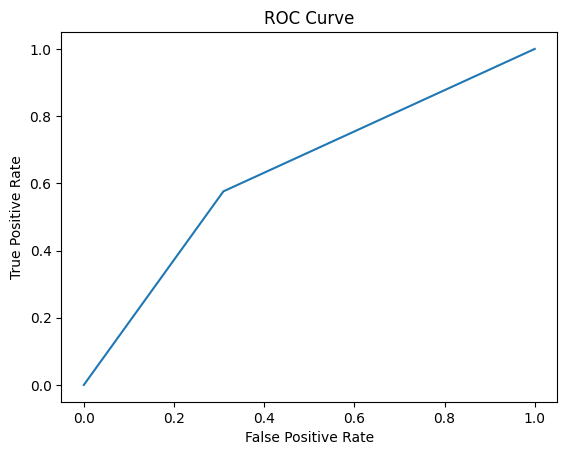

_____________________________________________



In [ ]:
# Reducing dimensionality:


pca = PCA(n_components = 6)
pca.fit(X)
df_ml_pca = pca.transform(X)

print(f"Dimensions reduced to {df_ml_pca.shape[1]} from {df_ml_norm.shape[1]}")

print('Logistic Regression on original dimensions using weights:\n')
logistic_regression(X,Y,test_size=0.2,max_iter=1000,class_weight='balanced')
print('_____________________________________________\n')

print('Logistic Regression after PCA using weights:\n')
logistic_regression(df_ml_pca,Y,test_size=0.2,max_iter=1000,class_weight='balanced')
print('_____________________________________________\n')


In [ ]:
from scipy.stats import multivariate_normal
def gaussian_discriminant_analysis(X,Y,LDA=True):

  # Taking all the features for the dataset, trying to fit a Gaussian distribution to each class using maximum likelihood estimation. 
  # This involves computing a mean and a covariance matrix for each class

  classes = (np.unique(Y)) #gets the unique number of classes

  X,Y = np.array(X),np.array(Y)
  Y = Y.reshape(-1,1)
  np_combined = np.hstack((X,Y))
  np.random.seed(10) 
  np.random.shuffle(np_combined) #shuffling the entire dataset before splitting into training and testing

  test_size = int(np_combined.shape[0]*0.2)
  np_combined_train, np_combined_test = np_combined[0:test_size,:],np_combined[test_size:,:]

  pooled_sigma = np.zeros((np_combined_train.shape[1]-1,np_combined_train.shape[1]-1))
  ds = {}

  y_predicted_class = np.zeros((np_combined_test.shape[0],classes.shape[0]))


  if LDA == True: # using Maximum Likelihood Estimation, performing classification using linear discriminant analysis
    
    for c in classes:
      data = np_combined_train[np_combined_train[:,-1]==c,:]
      print(data.shape)
      x_c_train, y_c_train = data[:,0:-1],data[:,-1]

      n_c = x_c_train.shape[0] # number of points in class c
      print(f"Number of points in class {c}: {n_c}")

      mu_c = np.mean(x_c_train,axis=0) 
      mu_c = np.reshape(mu_c,(mu_c.shape[0],1)) # mean (number of features x 1) matrix
      sigma_c = (((x_c_train-mu_c.T).T)@(x_c_train-mu_c.T))/n_c # sigma (number of features x number of features) matrix
        
      # saving the gaussian estimates for each class
      save_dict = {
          'mu': mu_c,
          'sigma':sigma_c,
          'n':n_c
            }

      ds[c] = save_dict
      pooled_sigma += sigma_c

    pooled_sigma = (pooled_sigma/x_c_train.shape[0])

    # Now applying LDA
    from scipy.stats import multivariate_normal
    
    for num,c in enumerate(classes):
      mu_c = ds[c]['mu']
      val_X,val_Y = np_combined_test[:,0:-1],np_combined_test[:,-1]

      if c == 0:       
        y = multivariate_normal.logpdf(val_X, mean=mu_c.flatten(), cov=pooled_sigma,allow_singular=True)+1
      else:
        y = multivariate_normal.logpdf(val_X, mean=mu_c.flatten(), cov=pooled_sigma,allow_singular=True)+2
      y_predicted_class[:,num] = y

    y_pred = np.argmax(y_predicted_class,axis=1)

    
  else: # computing QDA 
    from scipy.stats import multivariate_normal
    number_points_per_class = []

    for num,c in enumerate(classes):
      data = np_combined_train[np_combined_train[:,-1]==c,:]
      print(data.shape)
      x_c_train, y_c_train = data[:,0:-1],data[:,-1]

      n_c = x_c_train.shape[0] # number of points in class c
      print(f"Number of points in class {c}: {n_c}")

      number_points_per_class.append(n_c)
        
      mu_c = np.mean(X,axis=0)
      mu_c = np.reshape(mu_c,(mu_c.shape[0],1)) # mean (number of features x 1) matrix
      sigma_c = np.cov(x_c_train,rowvar=False)
      sigma_c_inv = np.linalg.inv(sigma_c)
      print(sigma_c.shape)

      save_dict = {
        'mu': mu_c,
        'sigma_c':sigma_c,
        'n':n_c
        }
      ds[int(c)] = save_dict

      # now applying QDA    
      #mu_c,sigma_c = ds[c]['mu'],ds[c]['sigma_c']
      val_X,val_Y = np_combined_test[:,0:-1],np_combined_test[:,-1]
      
      #y = -0.5*np.sum(((val_X-mu_c.T))@sigma_c_inv@((val_X-mu_c.T).T),axis=1)#-0.5*np.log(np.linalg.det(sigma_c))+np.log(data.shape[0]/np_combined.shape[0])

      if c == 0:
        y = multivariate_normal.logpdf(val_X, mean=mu_c.flatten(), cov=sigma_c,allow_singular=True)#-0.5*np.log(np.linalg.det(sigma_c))+np.log(data.shape[0]/np_combined_train.shape[0])+1
      else:
        y = multivariate_normal.logpdf(val_X, mean=mu_c.flatten(), cov=sigma_c,allow_singular=True)#-0.5*np.log(np.linalg.det(sigma_c))+np.log(data.shape[0]/np_combined_train.shape[0]))+5
      y_predicted_class[:,num] = y
    y_pred = np.argmax(y_predicted_class,axis=1)


  acc = accuracy_score(val_Y, y_pred)

  # Print the accuracy and the confusion matrix
  print(f"Accuracy: {acc*100}")

  prec_score = precision_score(val_Y,y_pred,pos_label=1)
  rec_score = recall_score(val_Y,y_pred,pos_label=1)
  f1 = f1_score(val_Y,y_pred,pos_label=1)
  print(f"Precision: {prec_score}\nRecall: {rec_score}\nF1 Score: {f1}")

  roc_curve_plot(val_Y,y_pred)

  return y_pred


Classifying using Linear Discriminant Analysis following Maximum Likelihood Estimation:

(30108, 7)
Number of points in class 0: 30108
(2453, 7)
Number of points in class 1: 2453
Accuracy: 66.95791041567495
Precision: 0.13150467454577527
Recall: 0.6204744069912609
F1 Score: 0.21701477330616403


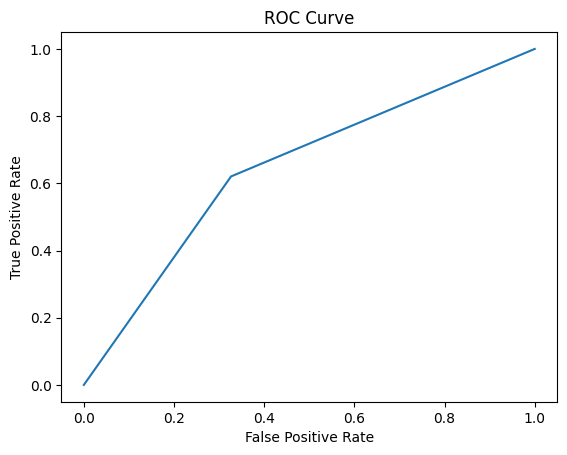

__________________________________________________________________________________________

Classifying using Quadratic Discriminant Analysis following Maximum Likelihood Estimation:

(30108, 7)
Number of points in class 0: 30108
(6, 6)
(2453, 7)
Number of points in class 1: 2453
(6, 6)
Accuracy: 73.00339357830566
Precision: 0.12477236679786172
Recall: 0.4419475655430712
F1 Score: 0.19460350909340787


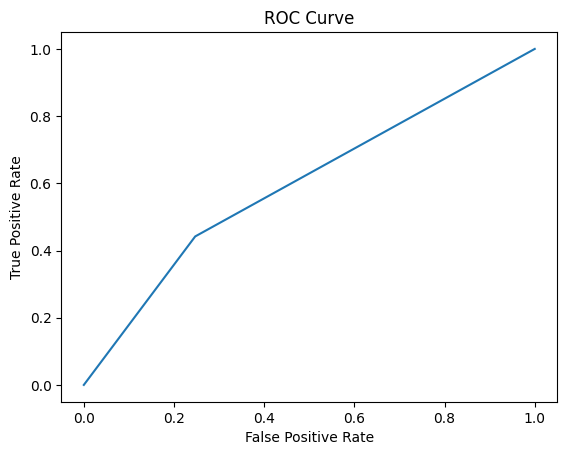

__________________________________________________________________________________________


In [ ]:
print(f"Classifying using Linear Discriminant Analysis following Maximum Likelihood Estimation:\n")
y_pred_LDA = gaussian_discriminant_analysis(df_ml_pca,Y)
print('__________________________________________________________________________________________\n')

print(f"Classifying using Quadratic Discriminant Analysis following Maximum Likelihood Estimation:\n")
y_pred_QDA = gaussian_discriminant_analysis(df_ml_pca,Y,LDA=False)
print('__________________________________________________________________________________________')

As evident from the results above, QDA has a higher absolute accuracy score of (75%) as opposed to LDA (~68%) however, LDA has a higher recall score ~0.61 whereas QDA results in a recall score of 0.44

The reason why we wanted to explore this dimension was to leverage generative models that classify outputs based on posterior probabilities. Given the high class imbalance of our dataset, we first estimated class parameters (mean and variance) of the dataset using maximum likelihood estimation. Next, we tried to use these estimated parameters to predict class probabilities using Linear Discriminant Analysis and Quadratic Discriminant Analysis. 

Recall: for logistic regression, we perform similar operations but we don't fit the data to gaussians first (i.e., we don't do MLE) and fit a logistic function directly to the data. 

For LDA, we assume different class means but same class variance (pooled variance) whereas QDA assumes different variances per class. 

LDA results in linear decision boundaries whereas QDA, given the quadratic features employed, results in more sinuous decision boundaries! 

Given that LDA performed better than QDA in terms of recall, it is safe to assume that QDA may be overfitting the data more towards the class with higher datasets. Under this instance, LDA performed better!

As well, in comparison to logistic regression results, we see improvements for LDA which can be attributed to computing MLE. 

### Support Vector Machine

Accuracy: 72.49145220400057
Precision: 0.13598341846176623
Recall: 0.5101360733129686
F1 Score: 0.2147282291057861


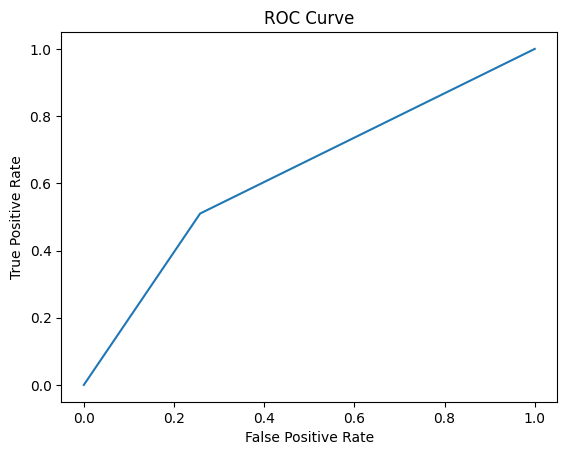

In [ ]:
from sklearn import svm

def SVM(X,Y,C=1,weighted=False):

  X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

  if weighted == True:
    class_weights = {0: 0.1, 1: 0.9}
    class_weights = 'balanced'
    clf = svm.SVC(kernel='linear', C=C, class_weight=class_weights)
  else:
    clf = svm.SVC(kernel='linear', C=C)

  clf.fit(X_train, y_train)

  # Make predictions on the test data
  y_pred = clf.predict(X_test)  

  acc = accuracy_score(y_test, y_pred)

  # Print the accuracy and the confusion matrix
  print(f"Accuracy: {acc*100}")

  prec_score = precision_score(y_test,y_pred,pos_label=1)
  rec_score = recall_score(y_test,y_pred,pos_label=1)
  f1 = f1_score(y_test,y_pred,pos_label=1)
  print(f"Precision: {prec_score}\nRecall: {rec_score}\nF1 Score: {f1}")

  roc_curve_plot(y_test,y_pred)

  return y_pred

y_pred = SVM(df_ml_pca,Y,weighted=True,C=10)

#### Verifying non-linear separability of the data by converting SVM to Hard Margin SVM by penalizing slack variables! If the algorithm converges, then we can ascertain the level of linear separability of the dataset

For this purpose, we are using a large C value: C=500

Accuracy: 72.40546239993448
Precision: 0.13599174467457803
Recall: 0.5123576784226603
F1 Score: 0.21493476234855544


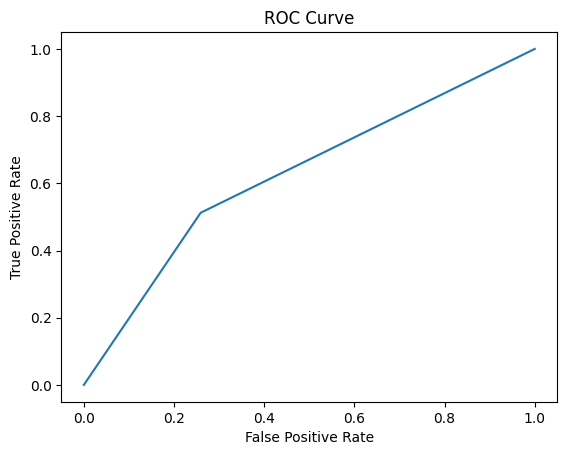

In [ ]:
y_pred = SVM(df_ml_pca,Y,weighted=True,C=100)

### Gradient Boosting Algorithm using Decision Trees

Accuracy: 72.48121532256413
Precision: 0.13598697839597515
Recall: 0.5104137739516801
F1 Score: 0.2147572588654554


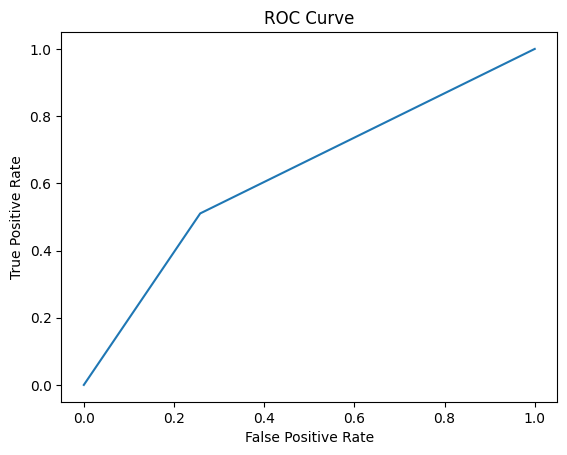

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
import time

def gradient_boosting(X,Y):
  start_ = time.time()

  X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

  max_depths = [1,3,5,7,9]
  min_samples_leafs = [2,4,6,8,10]
  number_trees = [1,100,500,1000]

  parameters_grid = {
      'n_estimators' : number_trees,
      'max_depth' : max_depths,
      'min_samples_split' : min_samples_leafs
      }

  gb = GradientBoostingClassifier(class_weights='balanced')

  # Create GridSearchCV object
  grid_search = GridSearchCV(gb, parameters_grid, cv=5,scoring='recall')

  # Fit the grid search object on the data
  grid_search.fit(X_train, y_train)


  print(f"Optimal hyperparameters for this case: {gridsearch.best_params_}")
  print(f"Highest Score: {gridsearch.best_score_}")

  print(f"Hyperparameter tuning completed in : {time.time()-start_}")

  y_pred = grid_search.predict(X_test)

  acc = accuracy_score(y_test, y_pred)

  # Print the accuracy and the confusion matrix
  print(f"Accuracy: {acc*100}")

  prec_score = precision_score(y_test,y_pred,pos_label=1)
  rec_score = recall_score(y_test,y_pred,pos_label=1)
  f1 = f1_score(y_test,y_pred,pos_label=1)
  print(f"Precision: {prec_score}\nRecall: {rec_score}\nF1 Score: {f1}")

  roc_curve_plot(y_test,y_pred)

  return y_pred


y_pred = SVM(df_ml_pca,Y,weighted=True)


### Neural Network (just for the sake of it)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.regularizers import l1, l2
from keras.optimizers import SGD
import time
import random

def neural_network(X,y):
  np.random.seed(1)
  tf.random.set_seed(1)
  random.seed(1)

  X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

  # Define NN
  model = Sequential()
  model.add(Dense(20, input_dim=X.shape[1], activation='relu'))#, kernel_regularizer=l2(1)))
  model.add(Dropout(0.2))
  model.add(Dense(10, activation='relu'))#, kernel_regularizer=l2(1))) 
  model.add(Dropout(0.2))
  model.add(Dense(5, activation='softmax')) 
  sgd = SGD(lr=0.01,momentum=0.9)
  model.compile(loss='SparseCategoricalCrossentropy', optimizer='sgd', metrics=['accuracy']) 


  # Fit and predict with NN
  print(f"Training Neural Network:")
  start_time = time.time()
  model.fit(X_train, y_train, epochs=200, batch_size=50, verbose=0)
  print(f"Model Trained in {time.time()-start_time} seconds")

  from sklearn.metrics import accuracy_score
  yhat_train = model.predict(X_train)
  yhat_train = np.argmax(yhat_train,axis=1)
  print(f"Train Set Accuracy: {accuracy_score(yhat_train,y_train)}\n")

  yhat_test = model.predict(X_test)
  yhat_test = np.argmax(yhat_test,axis=1)
  
  acc = accuracy_score(y_test, yhat_test)

  # Print the accuracy and the confusion matrix
  print(f"Accuracy: {acc*100}")

  prec_score = precision_score(y_test,yhat_test,pos_label=1)
  rec_score = recall_score(y_test,yhat_test,pos_label=1)
  f1 = f1_score(y_test,yhat_test,pos_label=1)
  print(f"Precision: {prec_score}\nRecall: {rec_score}\nF1 Score: {f1}")
  return y_pred

y_pred = neural_network(df_ml_pca,Y)

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Training Neural Network:
Model Trained in 611.2818646430969 seconds
3562/3562 [==============================] - 5s 1ms/step
Train Set Accuracy: 0.9256958337720683

1527/1527 [==============================] - 2s 1ms/step
Accuracy: 92.6233032369019
Precision: 0.0
Recall: 0.0
F1 Score: 0.0


In [ ]:
# few things helpful for the report:
# ROC Curves?
# Table that summarizes all the learning models and their metrics?
# Why is LDA/Logistic Regression performing better?